In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os
from supervised.automl import AutoML
import category_encoders as ce
import math

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.metrics import median_absolute_error
print('Imported sci-kit learn and automl libraries!')

Imported sci-kit learn and automl libraries!


# Irish Data - ML approach
To start with I want a basic understanding of my data for ML purposes. Firstly, I will test using different types of encoding for column values on the whole dataset to make predictions. Once I do this and see some basic values for RMSE, I will then try to predict specific years values given the previous 3 years of data. This will be the best test of the predictive power of our models given the data at hand. We may need to go back to our data cleaning to add more columns in for better predictive power through this trial and error.

In [2]:
irl = pd.read_csv('more-removals.csv', index_col='Unnamed: 0')

In [3]:
dt = []
i = 0
county = np.array(irl['County'])
while i < len(county):
    if county[i] not in dt:
        dt.append(county[i])
        i += 1
    else:
        i += 1

In [4]:
dt = sorted(dt)
#dt

In [5]:
irl.drop(columns=['Postal Code'], inplace=True)

In [6]:
irl

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
0,"5 Braemor Drive, Churchtown",Dublin,343000.0,1,1,1,0,2010,1,Churchtown Dublin,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin,438500.0,1,1,1,1,2010,1,Dundrum Dublin,Dublin,0
3,"1 The Haven, Mornington",Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0
...,...,...,...,...,...,...,...,...,...,...,...,...
388593,"88 Lios Cian, Swords, County Dublin",Dublin,462000.0,1,1,1,2,2021,8,Swords,Dublin,0
388595,"46 Beresford Avenue, Donabate, County Dublin",Dublin,395000.0,1,0,0,2,2021,8,Donabate,Dublin,0
388596,"3 Ballustree Drive, Loughshinny, County Dublin",Dublin,718061.0,1,0,0,2,2021,9,Loughshinny,Dublin,0
388597,"Apt 1 7 Summerhill Road, Dun Laoghaire, Coun...",Dublin,625000.0,1,1,1,2,2021,9,Dún Laoghaire,Dublin,1


In [7]:
from sklearn.preprocessing import OneHotEncoder

df_categorical = irl[['Address', 'County', 'Town', 'Region']]

work_encoder = OneHotEncoder()
work_reshaped = np.array(df_categorical['County']).reshape(-1, 1)
work_values = work_encoder.fit_transform(work_reshaped)

print(df_categorical['County'][:15])
print()
print(work_values.toarray()[:15])
print()
print(work_encoder.inverse_transform(work_values)[:15])

0       Dublin
1        Laois
2       Dublin
3        Meath
4     Kilkenny
5       Dublin
6       Carlow
7         Cork
8        Clare
9       Dublin
10      Dublin
11        Cork
12       Meath
13      Dublin
14      Dublin
Name: County, dtype: object

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]

In [8]:
county_df = pd.DataFrame(work_values.toarray(), columns=dt)

In [9]:
county_df

,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,Kilkenny,...,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357319,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357320,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357321,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357322,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
res = pd.concat([irl.reset_index(drop=True),county_df.reset_index(drop=True)], axis=1)

In [11]:
irl = res

In [12]:
irl.drop(columns=['Address'], inplace=True)

In [13]:
irl['Town'].nunique()

1449

We can't one hot encode our town values due to the sheer number of unique values as per above. We could also one hot encode our region but I will leave this for now along with the other variables.

In [14]:
irl.head()

,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,...,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,Dublin,343000.0,1,1,1,0,2010,1,Churchtown Dublin,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dublin,438500.0,1,1,1,1,2010,1,Dundrum Dublin,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Target Encoding
Let's begin by trying to target encode our categorical columns.

In [15]:
encoder = TargetEncoder()
irl['Town'] = encoder.fit_transform(irl['Town'], irl['Price (€)'])

In [16]:
irl

,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,...,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,Dublin,343000.0,1,1,1,0,2010,1,430434.729738,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Laois,185000.0,1,0,0,1,2010,1,147127.854959,Midlands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dublin,438500.0,1,1,1,1,2010,1,424234.424483,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Meath,400000.0,1,1,1,1,2010,1,247651.372740,Mid-East,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kilkenny,160000.0,1,1,1,1,2010,1,191349.416224,South East (IE),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357319,Dublin,462000.0,1,1,1,2,2021,8,277623.175891,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357320,Dublin,395000.0,1,0,0,2,2021,8,320933.545744,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357321,Dublin,718061.0,1,0,0,2,2021,9,378347.511657,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357322,Dublin,625000.0,1,1,1,2,2021,9,561355.085034,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
encoder = TargetEncoder()
irl['Region'] = encoder.fit_transform(irl['Region'], irl['Price (€)'])

In [18]:
irl

,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,...,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,Dublin,343000.0,1,1,1,0,2010,1,430434.729738,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Laois,185000.0,1,0,0,1,2010,1,147127.854959,134628.443080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dublin,438500.0,1,1,1,1,2010,1,424234.424483,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Meath,400000.0,1,1,1,1,2010,1,247651.372740,264896.895628,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kilkenny,160000.0,1,1,1,1,2010,1,191349.416224,155092.891300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357319,Dublin,462000.0,1,1,1,2,2021,8,277623.175891,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357320,Dublin,395000.0,1,0,0,2,2021,8,320933.545744,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357321,Dublin,718061.0,1,0,0,2,2021,9,378347.511657,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357322,Dublin,625000.0,1,1,1,2,2021,9,561355.085034,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
irl['Apartment'] = irl['Apartment'].fillna(0.0)

In [20]:
irl

,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,...,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,Dublin,343000.0,1,1,1,0,2010,1,430434.729738,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Laois,185000.0,1,0,0,1,2010,1,147127.854959,134628.443080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dublin,438500.0,1,1,1,1,2010,1,424234.424483,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Meath,400000.0,1,1,1,1,2010,1,247651.372740,264896.895628,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kilkenny,160000.0,1,1,1,1,2010,1,191349.416224,155092.891300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357319,Dublin,462000.0,1,1,1,2,2021,8,277623.175891,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357320,Dublin,395000.0,1,0,0,2,2021,8,320933.545744,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357321,Dublin,718061.0,1,0,0,2,2021,9,378347.511657,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357322,Dublin,625000.0,1,1,1,2,2021,9,561355.085034,361260.635808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
irl['LogPrice (€)'] = np.log(irl['Price (€)'])

In [22]:
irl.drop(columns=['Price (€)', 'County'], inplace=True)

In [23]:
# this function finds all values that fall within internationally accepted +-10% of actual prices in our predictions
# we can modify the threshold as we feel the need to here
def accuracy_threshold(test, pred, num):
    test = np.array(test)
    pred = np.array(pred)
# get within x% of actual price , not within log price as this will be misleading / incorrect
    test = np.exp(test)
    pred = np.exp(pred)
    count = 0
    for i in range(len(pred)):
        if test[i] != 0:  
            ten = test[i] * num
            res = test[i] - pred[i]
        else:
            res = 0
            ten = 0
        
        if res < 0:
            res = res * -1
        else:
            res = res
            
        if res <= ten:
            count += 1
        else:
            continue
    return (count / len(test))

## As per our project proposal let's try use AutoML to evaluate the best performing algorithms
### We will do a basic test on the whole of the dataset to start instead of testing on specific years
We will try this on a variety of different algorithms. We will just test this using the whole dataset first then split into different years to predict a specific year (this mean using 2010, 2011 and 2012 data to predict 2013 house prices and so forth).

In [24]:
x = irl.loc[:, irl.columns != 'LogPrice (€)']
y = irl['LogPrice (€)']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [26]:
automl = AutoML(total_time_limit=5*60)
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.764382 trained in 1.56 seconds
2_DecisionTree rmse 0.600725 trained in 24.77 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.536774 trained in 227.28 seconds
4_Default_NeuralNetwork rmse 0.552751 trained in 48.33 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.536774 trained in 1.0 seconds
AutoML fit time: 344.13 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [27]:
# calculated values
y_predicted = automl.predict(X_test)
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,y_predicted)

0.2917221735822647

In [28]:
accuracy_threshold(y_test, y_predicted, 0.1)

0.19593649135245061

In [29]:
median_se = np.square(np.subtract(y_test, y_predicted)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.29285376817275477


For a 85:15 training to test split, we see XgBoost is marginally the best performing algorithm here. Let's try this on more training to test splits now to give us a more definite answer on the performance of our algorithms.

## Let's try target encode our counties instead
We used one hot encoding for our county dataframe previously we will now utilise target encoding like we used for towns and regions already.

In [30]:
irl = pd.read_csv('more-removals.csv', index_col='Unnamed: 0')

In [31]:
irl.drop(columns=['Postal Code'], inplace=True)
irl

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
0,"5 Braemor Drive, Churchtown",Dublin,343000.0,1,1,1,0,2010,1,Churchtown Dublin,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin,438500.0,1,1,1,1,2010,1,Dundrum Dublin,Dublin,0
3,"1 The Haven, Mornington",Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0
...,...,...,...,...,...,...,...,...,...,...,...,...
388593,"88 Lios Cian, Swords, County Dublin",Dublin,462000.0,1,1,1,2,2021,8,Swords,Dublin,0
388595,"46 Beresford Avenue, Donabate, County Dublin",Dublin,395000.0,1,0,0,2,2021,8,Donabate,Dublin,0
388596,"3 Ballustree Drive, Loughshinny, County Dublin",Dublin,718061.0,1,0,0,2,2021,9,Loughshinny,Dublin,0
388597,"Apt 1 7 Summerhill Road, Dun Laoghaire, Coun...",Dublin,625000.0,1,1,1,2,2021,9,Dún Laoghaire,Dublin,1


In [32]:
encoder = TargetEncoder()
irl['Town'] = encoder.fit_transform(irl['Town'], irl['Price (€)'])

In [33]:
encoder = TargetEncoder()
irl['Region'] = encoder.fit_transform(irl['Region'], irl['Price (€)'])

In [34]:
encoder = TargetEncoder()
irl['County'] = encoder.fit_transform(irl['County'], irl['Price (€)'])

In [35]:
irl

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
0,"5 Braemor Drive, Churchtown",361260.635808,343000.0,1,1,1,0,2010,1,430434.729738,361260.635808,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",145782.783809,185000.0,1,0,0,1,2010,1,147127.854959,134628.443080,0
2,"1 Meadow Avenue, Dundrum",361260.635808,438500.0,1,1,1,1,2010,1,424234.424483,361260.635808,0
3,"1 The Haven, Mornington",236750.557128,400000.0,1,1,1,1,2010,1,247651.372740,264896.895628,0
4,"11 Melville Heights, Kilkenny",180301.514628,160000.0,1,1,1,1,2010,1,191349.416224,155092.891300,0
...,...,...,...,...,...,...,...,...,...,...,...,...
388593,"88 Lios Cian, Swords, County Dublin",361260.635808,462000.0,1,1,1,2,2021,8,277623.175891,361260.635808,0
388595,"46 Beresford Avenue, Donabate, County Dublin",361260.635808,395000.0,1,0,0,2,2021,8,320933.545744,361260.635808,0
388596,"3 Ballustree Drive, Loughshinny, County Dublin",361260.635808,718061.0,1,0,0,2,2021,9,378347.511657,361260.635808,0
388597,"Apt 1 7 Summerhill Road, Dun Laoghaire, Coun...",361260.635808,625000.0,1,1,1,2,2021,9,561355.085034,361260.635808,1


In [36]:
irl.drop(columns=['Address'], inplace=True)

In [37]:
irl

,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
0,361260.635808,343000.0,1,1,1,0,2010,1,430434.729738,361260.635808,0
1,145782.783809,185000.0,1,0,0,1,2010,1,147127.854959,134628.443080,0
2,361260.635808,438500.0,1,1,1,1,2010,1,424234.424483,361260.635808,0
3,236750.557128,400000.0,1,1,1,1,2010,1,247651.372740,264896.895628,0
4,180301.514628,160000.0,1,1,1,1,2010,1,191349.416224,155092.891300,0
...,...,...,...,...,...,...,...,...,...,...,...
388593,361260.635808,462000.0,1,1,1,2,2021,8,277623.175891,361260.635808,0
388595,361260.635808,395000.0,1,0,0,2,2021,8,320933.545744,361260.635808,0
388596,361260.635808,718061.0,1,0,0,2,2021,9,378347.511657,361260.635808,0
388597,361260.635808,625000.0,1,1,1,2,2021,9,561355.085034,361260.635808,1


In [38]:
irl['LogPrice (€)'] = np.log(irl['Price (€)'])

In [39]:
irl.drop(columns=['Price (€)'], inplace=True)

In [40]:
x = irl.loc[:, irl.columns != 'LogPrice (€)']
y = irl['LogPrice (€)']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
automl = AutoML(total_time_limit=5*60)
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.760401 trained in 2.47 seconds
2_DecisionTree rmse 0.597307 trained in 9.59 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.536204 trained in 75.26 seconds
4_Default_NeuralNetwork rmse 0.552676 trained in 21.33 seconds
5_Default_RandomForest rmse 0.578325 trained in 42.95 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.536204 trained in 0.65 seconds
AutoML fit time: 184.38 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [42]:
# calculated values
y_predicted = automl.predict(X_test)
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test, y_predicted)

0.28847777488847454

In [43]:
accuracy_threshold(y_test, y_predicted, 0.1)

0.19931342002649302

In [44]:
median_se = np.square(np.subtract(y_test, y_predicted)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.29248027365325235


### Improvements Already!
Clearly, we can see this is a small improvement instead of using our counties column as a "dummy" variable. XgBoost remains the best performing algorithm but we can already see an improvement here in our RMSE values which have slightly improved. This perfectly illustrates the importance of encoding our variables properly.

### Let's try predict a specific years values given some historical data
We will look at using 3 years worth of data and use it to predict some data for a selected year, let's say 2021, now.

In [45]:
specific21 = irl[irl['Year'] > 2017]

A regular train to test split will not suffice here as we need only the years 2018, 2019 and 2020 in our training data, while only using the houses associated with 2021 in our test data.

In [46]:
specific21[specific21['Year'] == 2021]

,County,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,LogPrice (€)
220841,214469.530724,1,0,0,2,2021,1,148628.148799,204934.903915,0,11.974079
220842,361260.635808,1,0,0,2,2021,1,137735.625684,361260.635808,0,12.170192
220843,163968.236735,1,1,1,2,2021,1,128196.318031,157475.071473,0,11.695247
220844,236750.557128,1,1,1,2,2021,1,226970.904827,264896.895628,0,12.796633
220845,214469.530724,1,1,1,2,2021,1,211266.163349,204934.903915,0,11.289782
...,...,...,...,...,...,...,...,...,...,...,...
388593,361260.635808,1,1,1,2,2021,8,277623.175891,361260.635808,0,13.043320
388595,361260.635808,1,0,0,2,2021,8,320933.545744,361260.635808,0,12.886641
388596,361260.635808,1,0,0,2,2021,9,378347.511657,361260.635808,0,13.484310
388597,361260.635808,1,1,1,2,2021,9,561355.085034,361260.635808,1,13.345507


In [47]:
specific21.shape[0]

138119

In [48]:
train_21 = specific21[specific21['Year'] < 2021]

In [49]:
train_21 = train_21.sample(n = 80000)
train_21

,County,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,LogPrice (€)
275127,102165.055301,1,1,1,1,2019,7,73445.404485,145745.453929,0,12.203570
246325,214469.530724,1,1,1,1,2019,2,130215.181439,204934.903915,0,12.506177
335240,180301.514628,1,1,1,2,2020,12,218213.824347,155092.891300,0,12.242887
166189,306224.371059,1,1,1,1,2018,8,230039.958613,264896.895628,0,12.706848
207222,137989.237361,1,1,1,1,2020,5,155740.044282,134628.443080,0,11.350407
...,...,...,...,...,...,...,...,...,...,...,...
216629,255506.270816,1,1,1,2,2020,11,309655.820218,264896.895628,0,12.384219
247067,214469.530724,1,1,1,1,2019,7,211266.163349,204934.903915,0,12.506177
200909,155896.206914,1,1,1,1,2020,1,154347.384897,155092.891300,0,12.419166
274958,102165.055301,1,1,1,1,2018,9,77287.274463,145745.453929,0,10.809728


In [50]:
test_21 = specific21[specific21['Year'] == 2021]

In [51]:
x_train_21 = train_21.loc[:, train_21.columns != 'LogPrice (€)']
y_train_21 = train_21['LogPrice (€)']

In [52]:
# let's take a random sample of 20,000 sales from 2021 to test on
test_21 = test_21.sample(n = 20000)
test_21

,County,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,LogPrice (€)
227520,151589.100878,1,1,1,1,2021,4,153119.940660,155092.891300,0,12.560244
255892,158158.649982,1,1,1,2,2021,3,136957.243984,155092.891300,0,12.128111
229274,116098.779413,1,1,1,2,2021,6,114070.643982,136018.521481,0,10.950807
227112,178761.270508,1,0,0,1,2021,4,343635.328072,145745.453929,0,12.890370
234551,123199.985421,1,1,1,2,2021,8,93074.415651,136018.521481,0,11.790557
...,...,...,...,...,...,...,...,...,...,...,...
221164,116098.779413,1,0,0,2,2021,1,128006.114667,136018.521481,0,11.951180
222915,180301.514628,1,1,1,2,2021,2,191349.416224,155092.891300,0,12.577636
220936,214469.530724,1,1,1,2,2021,1,211266.163349,204934.903915,0,11.918391
226595,102165.055301,1,1,1,2,2021,4,165095.299476,145745.453929,0,12.429216


In [53]:
x_test_21 = test_21.loc[:, test_21.columns != 'LogPrice (€)']
y_test_21 = test_21['LogPrice (€)']

In [54]:
automl = AutoML(total_time_limit=5*60)
automl.fit(x_train_21, y_train_21)

Linear algorithm was disabled.
AutoML directory: AutoML_3
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.69617 trained in 1.05 seconds
2_DecisionTree rmse 0.535429 trained in 6.35 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.498532 trained in 14.07 seconds
4_Default_NeuralNetwork rmse 0.507047 trained in 10.71 seconds
5_Default_RandomForest rmse 0.518101 trained in 12.04 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.498532 trained in 0.96 seconds
AutoML fit time: 67.69 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [55]:
# calculated values
y_predicted_21 = automl.predict(x_test_21)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_predicted_21)
print('MSE for AutoML 2021 is: ' + str(mse))

MSE for AutoML 2021 is: 0.2732134335546683


In [56]:
rmse = mean_squared_error(y_test_21,y_predicted_21, squared=False)
print('RMSE for AutoML 2020 is: ' + str(rmse))

RMSE for AutoML 2020 is: 0.5226982241740145


In [57]:
acc = accuracy_threshold(y_test_21, y_predicted_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.2139


In [58]:
median_se = np.square(np.subtract(y_test_21,y_predicted_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2745556453915603


In [59]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df11 = pd.DataFrame(columns=cnames)

df11 = df11.append({'Algorithm': 'AutoML',
            'Year': 2021,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

### It seems our results are even more accurate when selecting a specific year to predict
It is interesting to note here our RMSE values are equal between XgBoost and Ensemble models. The results here across all our evaluation metrics are very strong it has to be said. We will now test 2020 and a couple of more years to robustly test our yearly predictions.

### 2020 predictions

In [60]:
specific20 = irl[irl['Year'] > 2016]

In [61]:
test_20 = specific20[specific20['Year'] == 2020]
train_20 = specific20[specific20['Year'] < 2020]

In [62]:
train_20 = train_20.sample(n =75000)

In [63]:
x_train_20 = train_20.loc[:, train_20.columns != 'LogPrice (€)']
y_train_20 = train_20['LogPrice (€)']

In [64]:
test_20 = test_20.sample(n = 25000)

In [65]:
x_test_20 = test_20.loc[:, test_20.columns != 'LogPrice (€)']
y_test_20 = test_20['LogPrice (€)']

In [66]:
automl = AutoML(total_time_limit=5*60)
automl.fit(x_train_20, y_train_20)

Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.720615 trained in 1.4 seconds
2_DecisionTree rmse 0.555587 trained in 6.43 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.518141 trained in 12.86 seconds
4_Default_NeuralNetwork rmse 0.526593 trained in 7.0 seconds
5_Default_RandomForest rmse 0.538344 trained in 7.17 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.518141 trained in 0.79 seconds
AutoML fit time: 54.95 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [67]:
# calculated values
y_predicted_20 = automl.predict(x_test_20)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_predicted_20)
print('MSE for AutoML 2020 is: ' + str(mse))

MSE for AutoML 2020 is: 0.26305587487632126


In [68]:
rmse = mean_squared_error(y_test_20,y_predicted_20, squared=False)
print('RMSE for AutoML 2020 is: ' + str(rmse))

RMSE for AutoML 2020 is: 0.5128897297434618


In [69]:
acc = accuracy_threshold(y_test_20, y_predicted_20, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.2314


In [70]:
print("Median Absolute Error:\n")
print(median_absolute_error(y_test_20,y_predicted_20))

Median Absolute Error:

0.25824658092888697


In [71]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df10 = pd.DataFrame(columns=cnames)

df10 = df10.append({'Algorithm': 'AutoML',
            'Year': 2020,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

### Opinions on these results
Again, our results are very strong here. While not as strong as before we do have a slightly different training to test split here (75:25 instead of 80:20 previously).

### Multiple Linear Regression

Next, I will try implement some algorithms not specified in our autoML library which so far has only utilised XgBoost, Random Forest, Decison Tree and ensemble algorithms. I will attempt to implement other ML algorithms such as multiple linear regression and adaboost among others.

There is a couple of different libraries we can use here for linear regression:
- Sci-kit learn's linear model library
- Statsmodel

For the purpose of this I will remain consistent with the use of the sci-kit learn libraries.

In [72]:
from sklearn import linear_model

#### Let's try predict our 2021 values again using MLR

In [73]:
lm = linear_model.LinearRegression()
lm.fit(x_train_21, y_train_21) # fitting the model

LinearRegression()

In [74]:
y_pred_21 = lm.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_pred_21)
print('MSE for MLR 2021 is: ' + str(mse))

MSE for MLR 2021 is: 0.2814927963171116


In [75]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.19495


In [76]:
median_se = np.square(np.subtract(y_test_21,y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.28280737509065085


In [77]:
mean = np.square(np.subtract(y_test_21,y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5305589470710226


In [78]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df9 = pd.DataFrame(columns=cnames)

df9 = df9.append({'Algorithm': 'MLR',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

### Initial impressions on these results
Our results here are actually quite impressive. Our accuracy does seem to be lower than everything we have tried across the board but our RMESE, RMSE and MSE values are very strong when compared to our results previously. The multiple regression model is able to make more accurate predictions on our data than a lot of the algorithms we have already tested. Linear regression is very popular for house price predictions and is a model that a lot of valuers would follow when pricing a property. Let's test this further on other years.

### 2020 predictions

In [79]:
lm = linear_model.LinearRegression()
lm.fit(x_train_20, y_train_20) # fitting the model

LinearRegression()

In [80]:
y_pred_20 = lm.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_pred_20)
print('MSE for MLR 2020 is: ' + str(mse))

MSE for MLR 2020 is: 0.2821934011415585


In [81]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.21428


In [82]:
median_se = np.square(np.subtract(y_test_20,y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2637717662145613


In [83]:
mean = np.square(np.subtract(y_test_20,y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5312187883928435


In [84]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df8 = pd.DataFrame(columns=cnames)

df8 = df8.append({'Algorithm': 'MLR',
            'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

### Adaboost

#### 2021 Predictions

In [85]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [86]:
model = AdaBoostRegressor()

In [87]:
model.fit(x_train_21, y_train_21)

AdaBoostRegressor()

In [88]:
y_pred_21 = model.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_pred_21)
print('MSE for AdaBoost 2021 is: ' + str(mse))

MSE for AdaBoost 2021 is: 0.3771467788222056


In [89]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.11735


In [90]:
median_se = np.square(np.subtract(y_test_21,y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.4049747769050334


In [91]:
mean = np.square(np.subtract(y_test_21,y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.6141227717828125


In [92]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df7 = pd.DataFrame(columns=cnames)

df7 = df7.append({'Algorithm': 'AdaBoost',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

#### 2020 Predictions

In [93]:
model = AdaBoostRegressor()
model.fit(x_train_20, y_train_20)

AdaBoostRegressor()

In [94]:
y_pred_20 = model.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_pred_20)
print('MSE for AdaBoost 2020 is: ' + str(mse))

MSE for AdaBoost 2020 is: 0.35100530609489694


In [95]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.13568


In [96]:
median_se = np.square(np.subtract(y_test_20,y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3846867814947572


In [97]:
mean = np.square(np.subtract(y_test_20,y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5924570078030141


In [98]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df6 = pd.DataFrame(columns=cnames)

df6 = df6.append({'Algorithm': 'AdaBoost',
            'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

### Opinions on these Results
We definitely see a drop in predictive performance here with our basic implementation of the AdaBoost function, with all metrics showing a noticeable decline in performance in contrast to our best performing algorithms using autoML and MLR. We could use hyper-parameter optimisation here to try optimise our performance and this is something we will come back to later.

## Target Encode Based on Logarithmic Prices

In [99]:
irl2 = pd.read_csv('more-removals.csv', index_col='Unnamed: 0')

In [100]:
irl2.drop(columns=['Postal Code'], inplace=True)
#irl2

In [101]:
irl2['LogPrice (€)'] = np.log(irl2['Price (€)'])
irl2.head()

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,LogPrice (€)
0,"5 Braemor Drive, Churchtown",Dublin,343000.0,1,1,1,0,2010,1,Churchtown Dublin,Dublin,0,12.745486
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0,12.128111
2,"1 Meadow Avenue, Dundrum",Dublin,438500.0,1,1,1,1,2010,1,Dundrum Dublin,Dublin,0,12.991115
3,"1 The Haven, Mornington",Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0,12.899220
4,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0,11.982929


In [102]:
encoder = TargetEncoder()
irl2['Town'] = encoder.fit_transform(irl2['Town'], irl2['LogPrice (€)'])

In [103]:
encoder = TargetEncoder()
irl2['County'] = encoder.fit_transform(irl2['County'], irl2['LogPrice (€)'])

In [104]:
encoder = TargetEncoder()
irl2['Region'] = encoder.fit_transform(irl2['Region'], irl2['LogPrice (€)'])

In [105]:
irl2.head()

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,LogPrice (€)
0,"5 Braemor Drive, Churchtown",12.605258,343000.0,1,1,1,0,2010,1,12.894858,12.605258,0,12.745486
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",11.704589,185000.0,1,0,0,1,2010,1,11.753029,11.604036,0,12.128111
2,"1 Meadow Avenue, Dundrum",12.605258,438500.0,1,1,1,1,2010,1,12.798650,12.605258,0,12.991115
3,"1 The Haven, Mornington",12.238412,400000.0,1,1,1,1,2010,1,12.364997,12.336428,0,12.899220
4,"11 Melville Heights, Kilkenny",11.916285,160000.0,1,1,1,1,2010,1,12.001392,11.753376,0,11.982929


In [106]:
irl2.drop(columns=['Address', 'Price (€)'], inplace=True)

In [107]:
specific21_2 = irl2[irl2['Year'] > 2017]

In [108]:
test_2 = specific21_2[specific21_2['Year'] == 2021]
train_2 = specific21_2[specific21_2['Year'] < 2021]

train_2 = train_2.sample(n = 80000)
test_2 = test_2.sample(n = 20000)

In [109]:
x_train_2 = train_2.loc[:, train_2.columns != 'LogPrice (€)']
y_train_2 = train_2['LogPrice (€)']
x_test_2 = test_2.loc[:, test_2.columns != 'LogPrice (€)']
y_test_2 = test_2['LogPrice (€)']

### 2021 House Price AutoML Predictions - Target Encode Based on Logarithmic Prices

In [110]:
automl = AutoML(total_time_limit=5*60)
automl.fit(x_train_2, y_train_2)

Linear algorithm was disabled.
AutoML directory: AutoML_5
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.706305 trained in 1.49 seconds
2_DecisionTree rmse 0.545201 trained in 6.55 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.505896 trained in 12.12 seconds
4_Default_NeuralNetwork rmse 0.516347 trained in 6.41 seconds
5_Default_RandomForest rmse 0.528056 trained in 11.08 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.505896 trained in 0.63 seconds
AutoML fit time: 56.65 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [111]:
y_pred = automl.predict(x_test_2)
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test_2,y_pred)

0.2720206937555168

In [112]:
accuracy_threshold(y_test_2, y_pred, 0.1)

0.21615

In [113]:
print("Median Absolute Error:\n")
print(median_absolute_error(y_test_2,y_pred))

Median Absolute Error:

0.2745596163318922


### 2020 House Price AutoML Predictions - Logarithmic Target Encoding

In [114]:
specific20_2 = irl2[irl2['Year'] > 2016]

In [115]:
test_2 = specific20_2[specific20_2['Year'] == 2020]
train_2 = specific20_2[specific20_2['Year'] < 2020]

train_2 = train_2.sample(n = 80000)
test_2 = test_2.sample(n = 20000)

In [116]:
x_train_2 = train_2.loc[:, train_2.columns != 'LogPrice (€)']
y_train_2 = train_2['LogPrice (€)']
x_test_2 = test_2.loc[:, test_2.columns != 'LogPrice (€)']
y_test_2 = test_2['LogPrice (€)']

In [117]:
automl = AutoML(total_time_limit=5*60)
automl.fit(x_train_2, y_train_2)

Linear algorithm was disabled.
AutoML directory: AutoML_6
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.711663 trained in 0.92 seconds
2_DecisionTree rmse 0.546836 trained in 6.94 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.509354 trained in 13.45 seconds
4_Default_NeuralNetwork rmse 0.519257 trained in 8.92 seconds
5_Default_RandomForest rmse 0.53081 trained in 12.57 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.509354 trained in 0.63 seconds
AutoML fit time: 62.18 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [118]:
y_pred = automl.predict(x_test_2)
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test_2,y_pred)

0.26505191085424357

In [119]:
accuracy_threshold(y_test_2, y_pred, 0.1)

0.23065

In [120]:
print("Median Absolute Error:\n")
med = median_absolute_error(y_test_2,y_pred)
print(med)

Median Absolute Error:

0.25436839258472066


### Comparison of log price and standard price target encoding
Running the same experiments as before we see that our RMSE values improve for 2020 and are not as strong for 2021, with XgBoost once again the most superior algorithm going by this metric, we see that all our other metrics improve very slightly or drop very slightly. Overall, I feel this change doesn't massively help for improving our model.

## Let's now try a selection of other algorithms on our data
### LightGBM

In [121]:
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor

### 2020 House Price Prediction Using LightGBM

In [122]:
model = LGBMRegressor()
model.fit(x_train_20, y_train_20)

LGBMRegressor()

In [123]:
y_pred_20 = model.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_pred_20)
print('MSE for LightGBM 2020 is: ' + str(mse))

MSE for LightGBM 2020 is: 0.2605553813446862


In [124]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.22752


In [125]:
median_se = np.square(np.subtract(y_test_20,y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2569467011540294


In [126]:
mean = np.square(np.subtract(y_test_20,y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5104462570581616


In [127]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df5 = pd.DataFrame(columns=cnames)

df5 = df5.append({'Algorithm': 'LightGBM',
            'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

### 2021

In [128]:
model = LGBMRegressor()
model.fit(x_train_21, y_train_21)

LGBMRegressor()

In [129]:
y_pred_21 = model.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_pred_21)
print('MSE for LightGBM 2021 is: ' + str(mse))

MSE for LightGBM 2021 is: 0.26933703020367605


In [130]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.20775


In [131]:
median_se = np.square(np.subtract(y_test_21,y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2750191838847449


In [132]:
mean = np.square(np.subtract(y_test_21,y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5189769071969167


In [133]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df4 = pd.DataFrame(columns=cnames)

df4 = df4.append({'Algorithm': 'LightGBM',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

### CatBoost

#### 2021 Prediction

In [134]:
from catboost import CatBoostRegressor

In [135]:
model = CatBoostRegressor()
model.fit(x_train_21, y_train_21)

Learning rate set to 0.081822
0:	learn: 0.6723521	total: 179ms	remaining: 2m 58s
1:	learn: 0.6519335	total: 205ms	remaining: 1m 42s
2:	learn: 0.6341350	total: 229ms	remaining: 1m 16s
3:	learn: 0.6185183	total: 257ms	remaining: 1m 4s
4:	learn: 0.6047646	total: 289ms	remaining: 57.5s
5:	learn: 0.5922661	total: 317ms	remaining: 52.5s
6:	learn: 0.5813816	total: 345ms	remaining: 49s
7:	learn: 0.5722196	total: 370ms	remaining: 45.9s
8:	learn: 0.5637407	total: 403ms	remaining: 44.3s
9:	learn: 0.5565898	total: 438ms	remaining: 43.3s
10:	learn: 0.5501497	total: 463ms	remaining: 41.7s
11:	learn: 0.5448303	total: 489ms	remaining: 40.3s
12:	learn: 0.5399876	total: 516ms	remaining: 39.2s
13:	learn: 0.5358084	total: 542ms	remaining: 38.2s
14:	learn: 0.5322772	total: 569ms	remaining: 37.3s
15:	learn: 0.5291977	total: 594ms	remaining: 36.5s
16:	learn: 0.5266249	total: 622ms	remaining: 36s
17:	learn: 0.5244453	total: 648ms	remaining: 35.4s
18:	learn: 0.5222290	total: 673ms	remaining: 34.8s
19:	learn: 0

165:	learn: 0.4988778	total: 6.12s	remaining: 30.7s
166:	learn: 0.4988219	total: 6.14s	remaining: 30.6s
167:	learn: 0.4988020	total: 6.16s	remaining: 30.5s
168:	learn: 0.4987686	total: 6.19s	remaining: 30.4s
169:	learn: 0.4987292	total: 6.21s	remaining: 30.3s
170:	learn: 0.4987048	total: 6.23s	remaining: 30.2s
171:	learn: 0.4986708	total: 6.26s	remaining: 30.1s
172:	learn: 0.4986294	total: 6.3s	remaining: 30.1s
173:	learn: 0.4985923	total: 6.33s	remaining: 30s
174:	learn: 0.4985677	total: 6.35s	remaining: 29.9s
175:	learn: 0.4985334	total: 6.38s	remaining: 29.9s
176:	learn: 0.4984911	total: 6.4s	remaining: 29.8s
177:	learn: 0.4984643	total: 6.42s	remaining: 29.7s
178:	learn: 0.4984285	total: 6.45s	remaining: 29.6s
179:	learn: 0.4983823	total: 6.47s	remaining: 29.5s
180:	learn: 0.4983457	total: 6.51s	remaining: 29.4s
181:	learn: 0.4983166	total: 6.53s	remaining: 29.4s
182:	learn: 0.4982946	total: 6.56s	remaining: 29.3s
183:	learn: 0.4982558	total: 6.59s	remaining: 29.2s
184:	learn: 0.49

326:	learn: 0.4941036	total: 10.5s	remaining: 21.7s
327:	learn: 0.4940810	total: 10.6s	remaining: 21.6s
328:	learn: 0.4940536	total: 10.6s	remaining: 21.6s
329:	learn: 0.4940344	total: 10.6s	remaining: 21.5s
330:	learn: 0.4940084	total: 10.6s	remaining: 21.5s
331:	learn: 0.4939879	total: 10.7s	remaining: 21.4s
332:	learn: 0.4939637	total: 10.7s	remaining: 21.4s
333:	learn: 0.4939314	total: 10.7s	remaining: 21.4s
334:	learn: 0.4938801	total: 10.7s	remaining: 21.3s
335:	learn: 0.4938518	total: 10.8s	remaining: 21.3s
336:	learn: 0.4938275	total: 10.8s	remaining: 21.3s
337:	learn: 0.4938021	total: 10.8s	remaining: 21.2s
338:	learn: 0.4937742	total: 10.9s	remaining: 21.2s
339:	learn: 0.4937514	total: 10.9s	remaining: 21.1s
340:	learn: 0.4937311	total: 10.9s	remaining: 21.1s
341:	learn: 0.4937130	total: 10.9s	remaining: 21s
342:	learn: 0.4936938	total: 11s	remaining: 21s
343:	learn: 0.4936613	total: 11s	remaining: 21s
344:	learn: 0.4936398	total: 11s	remaining: 20.9s
345:	learn: 0.4936167	to

485:	learn: 0.4903936	total: 14.5s	remaining: 15.3s
486:	learn: 0.4903791	total: 14.5s	remaining: 15.3s
487:	learn: 0.4903626	total: 14.6s	remaining: 15.3s
488:	learn: 0.4903491	total: 14.6s	remaining: 15.3s
489:	learn: 0.4903292	total: 14.7s	remaining: 15.3s
490:	learn: 0.4903102	total: 14.7s	remaining: 15.2s
491:	learn: 0.4902918	total: 14.7s	remaining: 15.2s
492:	learn: 0.4902705	total: 14.8s	remaining: 15.2s
493:	learn: 0.4902516	total: 14.8s	remaining: 15.2s
494:	learn: 0.4902275	total: 14.8s	remaining: 15.1s
495:	learn: 0.4902092	total: 14.9s	remaining: 15.1s
496:	learn: 0.4901963	total: 14.9s	remaining: 15.1s
497:	learn: 0.4901766	total: 15s	remaining: 15.1s
498:	learn: 0.4901652	total: 15s	remaining: 15s
499:	learn: 0.4901514	total: 15s	remaining: 15s
500:	learn: 0.4901372	total: 15s	remaining: 15s
501:	learn: 0.4901194	total: 15.1s	remaining: 14.9s
502:	learn: 0.4901059	total: 15.1s	remaining: 14.9s
503:	learn: 0.4900888	total: 15.1s	remaining: 14.8s
504:	learn: 0.4900776	tota

651:	learn: 0.4875283	total: 17.1s	remaining: 9.11s
652:	learn: 0.4875097	total: 17.1s	remaining: 9.08s
653:	learn: 0.4874990	total: 17.1s	remaining: 9.05s
654:	learn: 0.4874665	total: 17.1s	remaining: 9.02s
655:	learn: 0.4874491	total: 17.1s	remaining: 8.98s
656:	learn: 0.4874312	total: 17.1s	remaining: 8.95s
657:	learn: 0.4874182	total: 17.2s	remaining: 8.92s
658:	learn: 0.4873984	total: 17.2s	remaining: 8.89s
659:	learn: 0.4873700	total: 17.2s	remaining: 8.86s
660:	learn: 0.4873536	total: 17.2s	remaining: 8.83s
661:	learn: 0.4873430	total: 17.2s	remaining: 8.8s
662:	learn: 0.4873215	total: 17.2s	remaining: 8.77s
663:	learn: 0.4873069	total: 17.3s	remaining: 8.73s
664:	learn: 0.4872981	total: 17.3s	remaining: 8.7s
665:	learn: 0.4872860	total: 17.3s	remaining: 8.67s
666:	learn: 0.4872771	total: 17.3s	remaining: 8.64s
667:	learn: 0.4872610	total: 17.3s	remaining: 8.61s
668:	learn: 0.4872316	total: 17.3s	remaining: 8.58s
669:	learn: 0.4872038	total: 17.3s	remaining: 8.54s
670:	learn: 0.

821:	learn: 0.4849247	total: 19.5s	remaining: 4.22s
822:	learn: 0.4849043	total: 19.5s	remaining: 4.19s
823:	learn: 0.4848936	total: 19.5s	remaining: 4.17s
824:	learn: 0.4848788	total: 19.5s	remaining: 4.14s
825:	learn: 0.4848680	total: 19.5s	remaining: 4.12s
826:	learn: 0.4848536	total: 19.6s	remaining: 4.09s
827:	learn: 0.4848430	total: 19.6s	remaining: 4.07s
828:	learn: 0.4848319	total: 19.6s	remaining: 4.04s
829:	learn: 0.4848223	total: 19.6s	remaining: 4.02s
830:	learn: 0.4848035	total: 19.6s	remaining: 3.99s
831:	learn: 0.4847966	total: 19.6s	remaining: 3.97s
832:	learn: 0.4847874	total: 19.7s	remaining: 3.94s
833:	learn: 0.4847713	total: 19.7s	remaining: 3.92s
834:	learn: 0.4847630	total: 19.7s	remaining: 3.89s
835:	learn: 0.4847528	total: 19.7s	remaining: 3.87s
836:	learn: 0.4847376	total: 19.7s	remaining: 3.84s
837:	learn: 0.4847198	total: 19.7s	remaining: 3.81s
838:	learn: 0.4846967	total: 19.8s	remaining: 3.79s
839:	learn: 0.4846891	total: 19.8s	remaining: 3.77s
840:	learn: 

980:	learn: 0.4829206	total: 22.5s	remaining: 436ms
981:	learn: 0.4829109	total: 22.5s	remaining: 413ms
982:	learn: 0.4829001	total: 22.6s	remaining: 390ms
983:	learn: 0.4828843	total: 22.6s	remaining: 367ms
984:	learn: 0.4828771	total: 22.6s	remaining: 344ms
985:	learn: 0.4828649	total: 22.6s	remaining: 321ms
986:	learn: 0.4828436	total: 22.7s	remaining: 298ms
987:	learn: 0.4828324	total: 22.7s	remaining: 275ms
988:	learn: 0.4828204	total: 22.7s	remaining: 252ms
989:	learn: 0.4828085	total: 22.7s	remaining: 230ms
990:	learn: 0.4827872	total: 22.8s	remaining: 207ms
991:	learn: 0.4827721	total: 22.8s	remaining: 184ms
992:	learn: 0.4827645	total: 22.8s	remaining: 161ms
993:	learn: 0.4827414	total: 22.8s	remaining: 138ms
994:	learn: 0.4827342	total: 22.9s	remaining: 115ms
995:	learn: 0.4827156	total: 22.9s	remaining: 91.9ms
996:	learn: 0.4827057	total: 22.9s	remaining: 68.9ms
997:	learn: 0.4826974	total: 22.9s	remaining: 45.9ms
998:	learn: 0.4826860	total: 22.9s	remaining: 23ms
999:	learn

In [136]:
y_pred_21 = model.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_pred_21)
print('MSE for CatBoost 2021 is: ' + str(mse))

MSE for CatBoost 2021 is: 0.2740080823152407


In [137]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.20825


In [138]:
median_se = np.square(np.subtract(y_test_21,y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.27690551828265636


In [139]:
mean = np.square(np.subtract(y_test_21,y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.523457813309954


In [140]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df3 = pd.DataFrame(columns=cnames)

df3 = df3.append({'Algorithm': 'CatBoost',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

#### 2020

In [141]:
model = CatBoostRegressor()
model.fit(x_train_20, y_train_20)

Learning rate set to 0.080991
0:	learn: 0.6914382	total: 15.4ms	remaining: 15.4s
1:	learn: 0.6706396	total: 34.4ms	remaining: 17.2s
2:	learn: 0.6523308	total: 49.1ms	remaining: 16.3s
3:	learn: 0.6362176	total: 68.1ms	remaining: 17s
4:	learn: 0.6221676	total: 86.7ms	remaining: 17.2s
5:	learn: 0.6097638	total: 101ms	remaining: 16.7s
6:	learn: 0.5983096	total: 115ms	remaining: 16.3s
7:	learn: 0.5888167	total: 128ms	remaining: 15.9s
8:	learn: 0.5802227	total: 142ms	remaining: 15.6s
9:	learn: 0.5730220	total: 155ms	remaining: 15.4s
10:	learn: 0.5661579	total: 169ms	remaining: 15.2s
11:	learn: 0.5602134	total: 185ms	remaining: 15.2s
12:	learn: 0.5552480	total: 205ms	remaining: 15.6s
13:	learn: 0.5509370	total: 222ms	remaining: 15.6s
14:	learn: 0.5473236	total: 236ms	remaining: 15.5s
15:	learn: 0.5440347	total: 250ms	remaining: 15.3s
16:	learn: 0.5412504	total: 263ms	remaining: 15.2s
17:	learn: 0.5388976	total: 278ms	remaining: 15.2s
18:	learn: 0.5365694	total: 295ms	remaining: 15.2s
19:	lear

161:	learn: 0.5109489	total: 5s	remaining: 25.9s
162:	learn: 0.5108787	total: 5.02s	remaining: 25.8s
163:	learn: 0.5108467	total: 5.04s	remaining: 25.7s
164:	learn: 0.5108035	total: 5.06s	remaining: 25.6s
165:	learn: 0.5107449	total: 5.09s	remaining: 25.6s
166:	learn: 0.5107003	total: 5.12s	remaining: 25.5s
167:	learn: 0.5106567	total: 5.14s	remaining: 25.5s
168:	learn: 0.5106016	total: 5.19s	remaining: 25.5s
169:	learn: 0.5105677	total: 5.22s	remaining: 25.5s
170:	learn: 0.5105363	total: 5.25s	remaining: 25.5s
171:	learn: 0.5105163	total: 5.29s	remaining: 25.5s
172:	learn: 0.5104693	total: 5.33s	remaining: 25.5s
173:	learn: 0.5104262	total: 5.36s	remaining: 25.5s
174:	learn: 0.5103935	total: 5.4s	remaining: 25.5s
175:	learn: 0.5103657	total: 5.43s	remaining: 25.4s
176:	learn: 0.5103126	total: 5.45s	remaining: 25.4s
177:	learn: 0.5102786	total: 5.48s	remaining: 25.3s
178:	learn: 0.5102470	total: 5.51s	remaining: 25.3s
179:	learn: 0.5102097	total: 5.54s	remaining: 25.2s
180:	learn: 0.51

323:	learn: 0.5056624	total: 9.64s	remaining: 20.1s
324:	learn: 0.5056297	total: 9.66s	remaining: 20.1s
325:	learn: 0.5055813	total: 9.67s	remaining: 20s
326:	learn: 0.5055409	total: 9.69s	remaining: 19.9s
327:	learn: 0.5055048	total: 9.7s	remaining: 19.9s
328:	learn: 0.5054820	total: 9.71s	remaining: 19.8s
329:	learn: 0.5054400	total: 9.73s	remaining: 19.8s
330:	learn: 0.5054265	total: 9.75s	remaining: 19.7s
331:	learn: 0.5054151	total: 9.76s	remaining: 19.6s
332:	learn: 0.5053961	total: 9.78s	remaining: 19.6s
333:	learn: 0.5053764	total: 9.79s	remaining: 19.5s
334:	learn: 0.5053508	total: 9.81s	remaining: 19.5s
335:	learn: 0.5053371	total: 9.83s	remaining: 19.4s
336:	learn: 0.5053178	total: 9.85s	remaining: 19.4s
337:	learn: 0.5052853	total: 9.88s	remaining: 19.3s
338:	learn: 0.5052615	total: 9.89s	remaining: 19.3s
339:	learn: 0.5052348	total: 9.91s	remaining: 19.2s
340:	learn: 0.5052050	total: 9.93s	remaining: 19.2s
341:	learn: 0.5051760	total: 9.94s	remaining: 19.1s
342:	learn: 0.5

487:	learn: 0.5019565	total: 12.1s	remaining: 12.7s
488:	learn: 0.5019323	total: 12.1s	remaining: 12.6s
489:	learn: 0.5019087	total: 12.1s	remaining: 12.6s
490:	learn: 0.5018938	total: 12.1s	remaining: 12.5s
491:	learn: 0.5018687	total: 12.1s	remaining: 12.5s
492:	learn: 0.5018406	total: 12.1s	remaining: 12.5s
493:	learn: 0.5018208	total: 12.1s	remaining: 12.4s
494:	learn: 0.5017930	total: 12.2s	remaining: 12.4s
495:	learn: 0.5017777	total: 12.2s	remaining: 12.4s
496:	learn: 0.5017589	total: 12.2s	remaining: 12.3s
497:	learn: 0.5017399	total: 12.2s	remaining: 12.3s
498:	learn: 0.5017207	total: 12.2s	remaining: 12.3s
499:	learn: 0.5016929	total: 12.2s	remaining: 12.2s
500:	learn: 0.5016786	total: 12.3s	remaining: 12.2s
501:	learn: 0.5016592	total: 12.3s	remaining: 12.2s
502:	learn: 0.5016390	total: 12.3s	remaining: 12.2s
503:	learn: 0.5016263	total: 12.3s	remaining: 12.1s
504:	learn: 0.5016038	total: 12.3s	remaining: 12.1s
505:	learn: 0.5015916	total: 12.3s	remaining: 12.1s
506:	learn: 

646:	learn: 0.4988851	total: 14.8s	remaining: 8.06s
647:	learn: 0.4988714	total: 14.8s	remaining: 8.05s
648:	learn: 0.4988513	total: 14.8s	remaining: 8.03s
649:	learn: 0.4988304	total: 14.9s	remaining: 8.01s
650:	learn: 0.4988146	total: 14.9s	remaining: 7.99s
651:	learn: 0.4988093	total: 14.9s	remaining: 7.97s
652:	learn: 0.4987966	total: 14.9s	remaining: 7.94s
653:	learn: 0.4987783	total: 15s	remaining: 7.91s
654:	learn: 0.4987572	total: 15s	remaining: 7.89s
655:	learn: 0.4987343	total: 15s	remaining: 7.86s
656:	learn: 0.4987216	total: 15s	remaining: 7.83s
657:	learn: 0.4986936	total: 15s	remaining: 7.81s
658:	learn: 0.4986695	total: 15s	remaining: 7.78s
659:	learn: 0.4986591	total: 15.1s	remaining: 7.75s
660:	learn: 0.4986435	total: 15.1s	remaining: 7.72s
661:	learn: 0.4986275	total: 15.1s	remaining: 7.7s
662:	learn: 0.4986154	total: 15.1s	remaining: 7.67s
663:	learn: 0.4986065	total: 15.1s	remaining: 7.64s
664:	learn: 0.4985926	total: 15.1s	remaining: 7.62s
665:	learn: 0.4985726	tot

811:	learn: 0.4962077	total: 17.3s	remaining: 4.01s
812:	learn: 0.4961989	total: 17.4s	remaining: 3.99s
813:	learn: 0.4961788	total: 17.4s	remaining: 3.97s
814:	learn: 0.4961598	total: 17.4s	remaining: 3.95s
815:	learn: 0.4961435	total: 17.4s	remaining: 3.92s
816:	learn: 0.4961296	total: 17.4s	remaining: 3.9s
817:	learn: 0.4961019	total: 17.4s	remaining: 3.88s
818:	learn: 0.4960790	total: 17.5s	remaining: 3.86s
819:	learn: 0.4960594	total: 17.5s	remaining: 3.83s
820:	learn: 0.4960422	total: 17.5s	remaining: 3.81s
821:	learn: 0.4960315	total: 17.5s	remaining: 3.79s
822:	learn: 0.4960137	total: 17.5s	remaining: 3.77s
823:	learn: 0.4959964	total: 17.5s	remaining: 3.75s
824:	learn: 0.4959756	total: 17.6s	remaining: 3.72s
825:	learn: 0.4959574	total: 17.6s	remaining: 3.7s
826:	learn: 0.4959434	total: 17.6s	remaining: 3.68s
827:	learn: 0.4959339	total: 17.6s	remaining: 3.66s
828:	learn: 0.4959200	total: 17.6s	remaining: 3.63s
829:	learn: 0.4958938	total: 17.6s	remaining: 3.61s
830:	learn: 0.

971:	learn: 0.4938821	total: 20.1s	remaining: 578ms
972:	learn: 0.4938711	total: 20.1s	remaining: 558ms
973:	learn: 0.4938612	total: 20.1s	remaining: 538ms
974:	learn: 0.4938546	total: 20.2s	remaining: 518ms
975:	learn: 0.4938461	total: 20.2s	remaining: 497ms
976:	learn: 0.4938387	total: 20.3s	remaining: 477ms
977:	learn: 0.4938277	total: 20.3s	remaining: 456ms
978:	learn: 0.4938226	total: 20.3s	remaining: 436ms
979:	learn: 0.4938074	total: 20.4s	remaining: 415ms
980:	learn: 0.4937898	total: 20.4s	remaining: 395ms
981:	learn: 0.4937810	total: 20.4s	remaining: 374ms
982:	learn: 0.4937719	total: 20.5s	remaining: 354ms
983:	learn: 0.4937574	total: 20.5s	remaining: 333ms
984:	learn: 0.4937448	total: 20.5s	remaining: 312ms
985:	learn: 0.4937316	total: 20.5s	remaining: 292ms
986:	learn: 0.4937162	total: 20.6s	remaining: 271ms
987:	learn: 0.4937065	total: 20.6s	remaining: 250ms
988:	learn: 0.4936994	total: 20.6s	remaining: 229ms
989:	learn: 0.4936858	total: 20.6s	remaining: 208ms
990:	learn: 

In [142]:
y_pred_20 = model.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_pred_20)
print(mse)

0.2624871686415511


In [143]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print(acc)

0.2286


In [144]:
median_se = np.square(np.subtract(y_test_20,y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2550913956911547


In [145]:
mean = np.square(np.subtract(y_test_20,y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5123350160213044


In [146]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df2 = pd.DataFrame(columns=cnames)

df2 = df2.append({'Algorithm': 'CatBoost',
            'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

### Bayesian Ridge

#### 2021

In [147]:
from sklearn.linear_model import BayesianRidge, LinearRegression

In [148]:
clf = BayesianRidge()
clf.fit(x_train_21, y_train_21)

BayesianRidge()

In [149]:
y_pred_21 = clf.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_pred_21)
print(mse)

0.28151034948818343


In [150]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print(acc)

0.1948


In [151]:
median_se = np.square(np.subtract(y_test_21,y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.28284559033412704


In [152]:
mean = np.square(np.subtract(y_test_21,y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5305754889628658


In [153]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df1 = pd.DataFrame(columns=cnames)

df1 = df1.append({'Algorithm': 'Bayesian',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

#### 2020

In [154]:
clf = BayesianRidge()
clf.fit(x_train_20, y_train_20)

BayesianRidge()

In [155]:
y_pred_20 = clf.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_pred_20)
print(mse)

0.2821939928717798


In [156]:
mse = mean_squared_error(y_test_20,y_pred_20)
print(mse)

0.2821939928717798


In [157]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print(acc)

0.21432


In [158]:
median_se = np.square(np.subtract(y_test_20,y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2638835127692687


In [159]:
mean = np.square(np.subtract(y_test_20,y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5312193453478317


In [160]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df = pd.DataFrame(columns=cnames)

df = df.append({'Algorithm': 'Bayesian',
           'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index=True)

In [161]:
vis = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)

### Opinions on LightGBM, CatBoost and BayesianRidge Performance
Looking at the performances of these algorithms, they appear very strong. They are certainly amongst the top performing algorithms such as XgBoost, Neural Networks, MLR and Random Forests. LightGBM in particular performs very strongly, with better results across all our four metrics for it's 2020 predictions and better accuracy / MSE values than it's AutoML 2021 results, with only marginal drops in performance in the other two metrics. There is definitely potential I feel here to further develop and optimise this model. Bayesian Ridge is a little bit further back in terms of performance with poorer results in RMSE than some of the aforementioned AutoML algorithms such as RF et cetera. Lastly, looking at our implementation of CatBoost, we actually have better results across the board here for our 2020 predictions than our AutoML XgBoost results, but we do see a noticeable drop in 2021 performance with only the accuracy metric improving on the AutoML XgBoost performance. Overall, I feel both LightGBM and CatBoost have potential to deliver strong results with further optimisation.

### Let's visualize our results so far

In [162]:
vis21 = vis[vis['Year'] == 2021]
vis20 = vis[vis['Year'] == 2020]

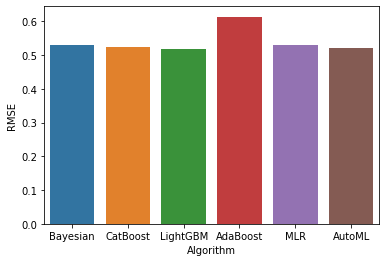

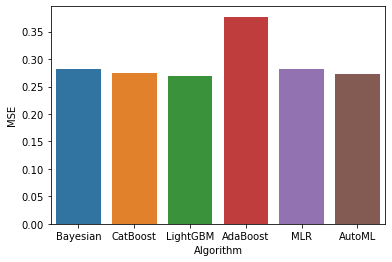

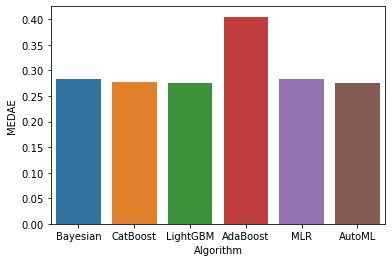

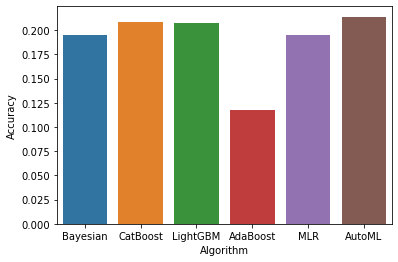

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
vis_cols = vis21[['RMSE', 'MSE', 'MEDAE', 'Accuracy']]
for i in vis_cols.columns:
    sns.barplot(x = vis21['Algorithm'], y = vis_cols[i], data = vis21)
    plt.show()

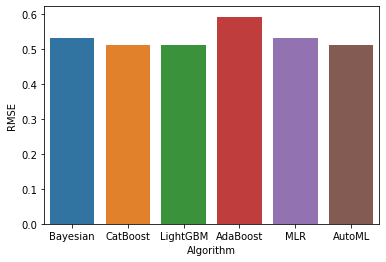

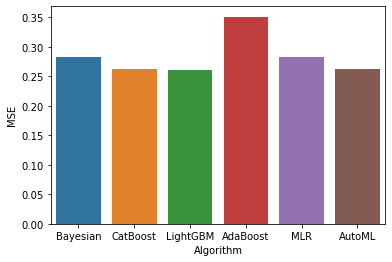

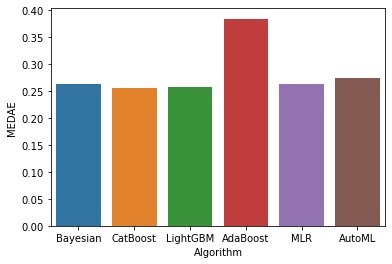

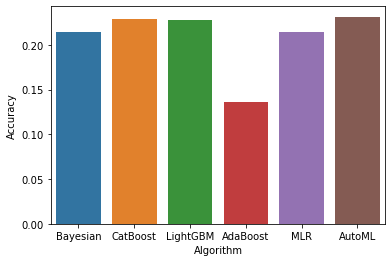

In [164]:
vis_cols = vis20[['RMSE', 'MSE', 'MEDAE', 'Accuracy']]
for i in vis_cols.columns:
    sns.barplot(x = vis20['Algorithm'], y = vis_cols[i], data = vis20)
    plt.show()

### What we can see from our Results
There are a few takeaways from graphing our results here, these include:

- Accuracy - all of algorithms with the excpetion of AdaBoost produce predictions which are accurate for every 1 in 5 properties roughly so far.
- Adaboost struggles - one thing that really stands out is our Adaboost results across RMSE, MSE and MEDAE values. They are consistently well above the rest of our algorithms here. One thing I feel really stands out is the Median Absolute Error and accuracy values it produces. It is always well above the rest of the algorithms here. Using the median instead of mean absolute error this is robust to outliers so values would be unaffected by the results at either end of the scale.
- Lastly, there is not much to seperate the rest of our algorithms here, all performing relatively well across the board given the basic implementation of them.

## Let's test on more years of data now
### 2019

In [165]:
specific19 = irl[irl['Year'] > 2015]

In [166]:
test_19 = specific19[specific19['Year'] == 2019]
train_19 = specific19[specific19['Year'] < 2019]

train_19 = train_19.sample(n = 80000)
test_19 = test_19.sample(n = 20000)

In [167]:
x_train_19 = train_19.loc[:, train_19.columns != 'LogPrice (€)']
y_train_19 = train_19['LogPrice (€)']
x_test_19 = test_19.loc[:, test_19.columns != 'LogPrice (€)']
y_test_19 = test_19['LogPrice (€)']

#### AutoML

In [168]:
automl = AutoML(total_time_limit=5*60)
automl.fit(x_train_19, y_train_19)

Linear algorithm was disabled.
AutoML directory: AutoML_7
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.749555 trained in 1.5 seconds
2_DecisionTree rmse 0.568437 trained in 6.22 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.532272 trained in 16.67 seconds
4_Default_NeuralNetwork rmse 0.542727 trained in 11.17 seconds
5_Default_RandomForest rmse 0.554154 trained in 21.66 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.532272 trained in 0.52 seconds
AutoML fit time: 77.85 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [169]:
y_pred_19 = automl.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19,y_pred_19)
print('MSE for AutoML 2019 is: ' + str(mse))

MSE for AutoML 2019 is: 0.25540515536308


In [170]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.22945


In [171]:
rmse = mean_squared_error(y_test_19,y_pred_19, squared=False)
print('RMSE for AutoML 2019 is: ' + str(rmse))

RMSE for AutoML 2019 is: 0.5053762512851984


In [172]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2639277357020635


In [173]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df12 = pd.DataFrame(columns = cnames)

df12 = df12.append({'Algorithm': 'AutoML',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### MLR

In [174]:
lm = linear_model.LinearRegression()
lm.fit(x_train_19, y_train_19) # fitting the model
y_pred_19 = lm.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for MLR 2019 is: ' + str(mse))

MSE for MLR 2019 is: 0.2698779464435666


In [175]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for MLR 2019 is: ' + str(rmse))

RMSE for MLR 2019 is: 0.5194977829053428


In [176]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.26752149863876123


In [177]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.2079


In [178]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df13 = pd.DataFrame(columns = cnames)

df13 = df13.append({'Algorithm': 'MLR',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### AdaBoost

In [179]:
model = AdaBoostRegressor()
model.fit(x_train_19, y_train_19)
y_pred_19 = model.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for AdaBoost 2019 is: ' + str(mse))

MSE for AdaBoost 2019 is: 0.3658906710964417


In [180]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for MLR 2019 is: ' + str(rmse))

RMSE for MLR 2019 is: 0.6048889741898439


In [181]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.41520970768783616


In [182]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.10705


In [183]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df14 = pd.DataFrame(columns = cnames)

df14 = df14.append({'Algorithm': 'AdaBoost',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### LightGBM

In [184]:
model = LGBMRegressor()
model.fit(x_train_19, y_train_19)
y_pred_19 = model.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for LightGBM 2019 is: ' + str(mse))

MSE for LightGBM 2019 is: 0.2542473610660642


In [185]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for LightGBM 2019 is: ' + str(rmse))

RMSE for LightGBM 2019 is: 0.5042294726273586


In [186]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.26250569449259586


In [187]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.2268


In [188]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df15 = pd.DataFrame(columns = cnames)

df15 = df15.append({'Algorithm': 'LightGBM',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### CatBoost

In [189]:
model = CatBoostRegressor()
model.fit(x_train_19, y_train_19)
y_pred_19 = model.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for CatBoost 2019 is: ' + str(mse))

Learning rate set to 0.081822
0:	learn: 0.7240881	total: 26.3ms	remaining: 26.2s
1:	learn: 0.7019200	total: 54.3ms	remaining: 27.1s
2:	learn: 0.6820399	total: 82.3ms	remaining: 27.3s
3:	learn: 0.6648162	total: 108ms	remaining: 27s
4:	learn: 0.6497151	total: 133ms	remaining: 26.4s
5:	learn: 0.6365488	total: 170ms	remaining: 28.2s
6:	learn: 0.6248599	total: 202ms	remaining: 28.6s
7:	learn: 0.6148913	total: 240ms	remaining: 29.8s
8:	learn: 0.6059609	total: 265ms	remaining: 29.2s
9:	learn: 0.5980196	total: 294ms	remaining: 29.1s
10:	learn: 0.5913225	total: 318ms	remaining: 28.6s
11:	learn: 0.5853804	total: 346ms	remaining: 28.4s
12:	learn: 0.5800249	total: 380ms	remaining: 28.8s
13:	learn: 0.5756296	total: 406ms	remaining: 28.6s
14:	learn: 0.5716852	total: 431ms	remaining: 28.3s
15:	learn: 0.5682450	total: 456ms	remaining: 28.1s
16:	learn: 0.5652183	total: 482ms	remaining: 27.9s
17:	learn: 0.5626428	total: 512ms	remaining: 27.9s
18:	learn: 0.5601351	total: 536ms	remaining: 27.7s
19:	learn:

163:	learn: 0.5334341	total: 5.17s	remaining: 26.3s
164:	learn: 0.5333984	total: 5.19s	remaining: 26.3s
165:	learn: 0.5332439	total: 5.22s	remaining: 26.2s
166:	learn: 0.5332135	total: 5.24s	remaining: 26.1s
167:	learn: 0.5331860	total: 5.25s	remaining: 26s
168:	learn: 0.5331404	total: 5.27s	remaining: 25.9s
169:	learn: 0.5330920	total: 5.3s	remaining: 25.9s
170:	learn: 0.5330436	total: 5.33s	remaining: 25.8s
171:	learn: 0.5329921	total: 5.35s	remaining: 25.8s
172:	learn: 0.5329633	total: 5.38s	remaining: 25.7s
173:	learn: 0.5329460	total: 5.4s	remaining: 25.6s
174:	learn: 0.5328980	total: 5.44s	remaining: 25.6s
175:	learn: 0.5328792	total: 5.46s	remaining: 25.6s
176:	learn: 0.5328204	total: 5.49s	remaining: 25.5s
177:	learn: 0.5327986	total: 5.51s	remaining: 25.4s
178:	learn: 0.5327794	total: 5.53s	remaining: 25.3s
179:	learn: 0.5327535	total: 5.54s	remaining: 25.2s
180:	learn: 0.5327249	total: 5.56s	remaining: 25.2s
181:	learn: 0.5326990	total: 5.59s	remaining: 25.1s
182:	learn: 0.53

322:	learn: 0.5282493	total: 9.1s	remaining: 19.1s
323:	learn: 0.5282288	total: 9.14s	remaining: 19.1s
324:	learn: 0.5282001	total: 9.17s	remaining: 19s
325:	learn: 0.5281760	total: 9.2s	remaining: 19s
326:	learn: 0.5281328	total: 9.22s	remaining: 19s
327:	learn: 0.5281111	total: 9.25s	remaining: 18.9s
328:	learn: 0.5280725	total: 9.27s	remaining: 18.9s
329:	learn: 0.5280200	total: 9.29s	remaining: 18.9s
330:	learn: 0.5279888	total: 9.32s	remaining: 18.8s
331:	learn: 0.5279561	total: 9.36s	remaining: 18.8s
332:	learn: 0.5279200	total: 9.39s	remaining: 18.8s
333:	learn: 0.5278914	total: 9.41s	remaining: 18.8s
334:	learn: 0.5278694	total: 9.44s	remaining: 18.7s
335:	learn: 0.5278403	total: 9.46s	remaining: 18.7s
336:	learn: 0.5278257	total: 9.49s	remaining: 18.7s
337:	learn: 0.5278130	total: 9.52s	remaining: 18.7s
338:	learn: 0.5277814	total: 9.55s	remaining: 18.6s
339:	learn: 0.5277575	total: 9.6s	remaining: 18.6s
340:	learn: 0.5277291	total: 9.68s	remaining: 18.7s
341:	learn: 0.5277171

496:	learn: 0.5240978	total: 13s	remaining: 13.1s
497:	learn: 0.5240841	total: 13s	remaining: 13.1s
498:	learn: 0.5240586	total: 13s	remaining: 13.1s
499:	learn: 0.5240324	total: 13s	remaining: 13s
500:	learn: 0.5240110	total: 13s	remaining: 13s
501:	learn: 0.5239882	total: 13.1s	remaining: 12.9s
502:	learn: 0.5239723	total: 13.1s	remaining: 12.9s
503:	learn: 0.5239403	total: 13.1s	remaining: 12.9s
504:	learn: 0.5239062	total: 13.1s	remaining: 12.8s
505:	learn: 0.5238859	total: 13.1s	remaining: 12.8s
506:	learn: 0.5238668	total: 13.1s	remaining: 12.7s
507:	learn: 0.5238409	total: 13.1s	remaining: 12.7s
508:	learn: 0.5238168	total: 13.1s	remaining: 12.7s
509:	learn: 0.5237911	total: 13.1s	remaining: 12.6s
510:	learn: 0.5237730	total: 13.2s	remaining: 12.6s
511:	learn: 0.5237557	total: 13.2s	remaining: 12.6s
512:	learn: 0.5237120	total: 13.2s	remaining: 12.5s
513:	learn: 0.5236944	total: 13.2s	remaining: 12.5s
514:	learn: 0.5236597	total: 13.2s	remaining: 12.4s
515:	learn: 0.5236470	tota

656:	learn: 0.5210059	total: 15.2s	remaining: 7.94s
657:	learn: 0.5209891	total: 15.2s	remaining: 7.91s
658:	learn: 0.5209744	total: 15.2s	remaining: 7.88s
659:	learn: 0.5209541	total: 15.3s	remaining: 7.86s
660:	learn: 0.5209377	total: 15.3s	remaining: 7.83s
661:	learn: 0.5209109	total: 15.3s	remaining: 7.8s
662:	learn: 0.5208969	total: 15.3s	remaining: 7.78s
663:	learn: 0.5208748	total: 15.3s	remaining: 7.75s
664:	learn: 0.5208574	total: 15.3s	remaining: 7.72s
665:	learn: 0.5208402	total: 15.3s	remaining: 7.69s
666:	learn: 0.5208242	total: 15.4s	remaining: 7.67s
667:	learn: 0.5208002	total: 15.4s	remaining: 7.64s
668:	learn: 0.5207823	total: 15.4s	remaining: 7.61s
669:	learn: 0.5207613	total: 15.4s	remaining: 7.58s
670:	learn: 0.5207444	total: 15.4s	remaining: 7.56s
671:	learn: 0.5207266	total: 15.4s	remaining: 7.53s
672:	learn: 0.5207039	total: 15.4s	remaining: 7.5s
673:	learn: 0.5206857	total: 15.5s	remaining: 7.48s
674:	learn: 0.5206726	total: 15.5s	remaining: 7.45s
675:	learn: 0.

823:	learn: 0.5182917	total: 18.1s	remaining: 3.87s
824:	learn: 0.5182775	total: 18.2s	remaining: 3.85s
825:	learn: 0.5182660	total: 18.2s	remaining: 3.83s
826:	learn: 0.5182474	total: 18.2s	remaining: 3.81s
827:	learn: 0.5182405	total: 18.3s	remaining: 3.79s
828:	learn: 0.5182301	total: 18.3s	remaining: 3.77s
829:	learn: 0.5182095	total: 18.3s	remaining: 3.75s
830:	learn: 0.5181929	total: 18.3s	remaining: 3.73s
831:	learn: 0.5181820	total: 18.4s	remaining: 3.71s
832:	learn: 0.5181659	total: 18.4s	remaining: 3.69s
833:	learn: 0.5181250	total: 18.4s	remaining: 3.66s
834:	learn: 0.5181159	total: 18.4s	remaining: 3.64s
835:	learn: 0.5180908	total: 18.5s	remaining: 3.62s
836:	learn: 0.5180796	total: 18.5s	remaining: 3.6s
837:	learn: 0.5180586	total: 18.5s	remaining: 3.58s
838:	learn: 0.5180389	total: 18.6s	remaining: 3.56s
839:	learn: 0.5180264	total: 18.6s	remaining: 3.54s
840:	learn: 0.5180148	total: 18.6s	remaining: 3.52s
841:	learn: 0.5180064	total: 18.6s	remaining: 3.5s
842:	learn: 0.

994:	learn: 0.5160171	total: 21.1s	remaining: 106ms
995:	learn: 0.5160056	total: 21.2s	remaining: 85ms
996:	learn: 0.5159922	total: 21.2s	remaining: 63.8ms
997:	learn: 0.5159847	total: 21.2s	remaining: 42.6ms
998:	learn: 0.5159748	total: 21.3s	remaining: 21.3ms
999:	learn: 0.5159599	total: 21.3s	remaining: 0us
MSE for CatBoost 2019 is: 0.2553231899383075


In [190]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for LightGBM 2019 is: ' + str(rmse))

RMSE for LightGBM 2019 is: 0.5052951513109022


In [191]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.26363347666797765


In [192]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.2273


In [193]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df16 = pd.DataFrame(columns = cnames)

df16 = df16.append({'Algorithm': 'CatBoost',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### BayesianRidge

In [194]:
clf = BayesianRidge()
clf.fit(x_train_19, y_train_19)
y_pred_19 = clf.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for BayesianRidge 2019 is: ' + str(mse))

MSE for BayesianRidge 2019 is: 0.2698768399874891


In [195]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for LightGBM 2019 is: ' + str(rmse))

RMSE for LightGBM 2019 is: 0.5194967179756664


In [196]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2675773906167995


In [197]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.20795


In [198]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df17 = pd.DataFrame(columns = cnames)

df17 = df17.append({'Algorithm': 'Bayesian',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

## 2018

In [199]:
specific18 = irl[irl['Year'] > 2014]
test_18 = specific18[specific18['Year'] == 2018]
train_18 = specific18[specific18['Year'] < 2018]

train_18 = train_18.sample(n = 80000)
test_18 = test_18.sample(n = 20000)

x_train_18 = train_18.loc[:, train_18.columns != 'LogPrice (€)']
y_train_18 = train_18['LogPrice (€)']
x_test_18 = test_18.loc[:, test_18.columns != 'LogPrice (€)']
y_test_18 = test_18['LogPrice (€)']

### AutoML

In [200]:
automl = AutoML(total_time_limit=5*60)
automl.fit(x_train_18, y_train_18)

Linear algorithm was disabled.
AutoML directory: AutoML_8
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.774026 trained in 1.04 seconds
2_DecisionTree rmse 0.592126 trained in 6.75 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.557642 trained in 14.93 seconds
4_Default_NeuralNetwork rmse 0.569001 trained in 7.07 seconds
5_Default_RandomForest rmse 0.580879 trained in 11.43 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.557642 trained in 0.35 seconds
AutoML fit time: 59.76 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [201]:
y_pred_18 = automl.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for AutoML 2018 is: ' + str(mse))

MSE for AutoML 2018 is: 0.2745494722112414


In [202]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1921


In [203]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for AutoML 2018 is: ' + str(rmse))

RMSE for AutoML 2018 is: 0.5239746866130476


In [204]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2675773906167995


In [205]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df18 = pd.DataFrame(columns = cnames)

df18 = df18.append({'Algorithm': 'AutoML',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### MLR

In [206]:
lm = linear_model.LinearRegression()
lm.fit(x_train_18, y_train_18) # fitting the model
y_pred_18 = lm.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for MLR 2018 is: ' + str(mse))

MSE for MLR 2018 is: 0.28422601954439586


In [207]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1861


In [208]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for MLR 2018 is: ' + str(rmse))

RMSE for MLR 2018 is: 0.5331285206630723


In [209]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.29141683275451485


In [210]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df19 = pd.DataFrame(columns = cnames)

df19 = df19.append({'Algorithm': 'MLR',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### AdaBoost

In [211]:
model = AdaBoostRegressor()
model.fit(x_train_18, y_train_18)
y_pred_18 = model.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for AdaBoost 2018 is: ' + str(mse))

MSE for AdaBoost 2018 is: 0.391274492158311


In [212]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.09865


In [213]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.4486147390770249


In [214]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for MLR 2018 is: ' + str(rmse))

RMSE for MLR 2018 is: 0.6255193779239065


In [215]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df20 = pd.DataFrame(columns = cnames)

df20 = df20.append({'Algorithm': 'AdaBoost',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### LightGBM

In [216]:
model = LGBMRegressor()
model.fit(x_train_18, y_train_18)
y_pred_18 = model.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for LightGBM 2018 is: ' + str(mse))

MSE for LightGBM 2018 is: 0.272435924725589


In [217]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.19415


In [218]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2944223773563048


In [219]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for MLR 2018 is: ' + str(rmse))

RMSE for MLR 2018 is: 0.52195394885525


In [220]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df21 = pd.DataFrame(columns = cnames)

df21 = df21.append({'Algorithm': 'LightGBM',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### CatBoost

In [221]:
model = CatBoostRegressor()
model.fit(x_train_18, y_train_18)
y_pred_18 = model.predict(x_test_18)

Learning rate set to 0.081822
0:	learn: 0.7471718	total: 11.6ms	remaining: 11.6s
1:	learn: 0.7242472	total: 22.3ms	remaining: 11.1s
2:	learn: 0.7045258	total: 32.9ms	remaining: 10.9s
3:	learn: 0.6869402	total: 43.8ms	remaining: 10.9s
4:	learn: 0.6714101	total: 54.4ms	remaining: 10.8s
5:	learn: 0.6578814	total: 67.8ms	remaining: 11.2s
6:	learn: 0.6460928	total: 83.6ms	remaining: 11.9s
7:	learn: 0.6358824	total: 96.1ms	remaining: 11.9s
8:	learn: 0.6268424	total: 106ms	remaining: 11.7s
9:	learn: 0.6191973	total: 120ms	remaining: 11.9s
10:	learn: 0.6124922	total: 132ms	remaining: 11.9s
11:	learn: 0.6062650	total: 143ms	remaining: 11.8s
12:	learn: 0.6011562	total: 154ms	remaining: 11.7s
13:	learn: 0.5965119	total: 164ms	remaining: 11.6s
14:	learn: 0.5924739	total: 177ms	remaining: 11.6s
15:	learn: 0.5890959	total: 191ms	remaining: 11.7s
16:	learn: 0.5862318	total: 202ms	remaining: 11.7s
17:	learn: 0.5836217	total: 214ms	remaining: 11.6s
18:	learn: 0.5812573	total: 224ms	remaining: 11.6s
19:

167:	learn: 0.5542563	total: 2.49s	remaining: 12.3s
168:	learn: 0.5542367	total: 2.5s	remaining: 12.3s
169:	learn: 0.5542001	total: 2.51s	remaining: 12.3s
170:	learn: 0.5541540	total: 2.52s	remaining: 12.2s
171:	learn: 0.5541279	total: 2.53s	remaining: 12.2s
172:	learn: 0.5540876	total: 2.54s	remaining: 12.2s
173:	learn: 0.5540696	total: 2.55s	remaining: 12.1s
174:	learn: 0.5540496	total: 2.56s	remaining: 12.1s
175:	learn: 0.5540144	total: 2.58s	remaining: 12.1s
176:	learn: 0.5539733	total: 2.59s	remaining: 12s
177:	learn: 0.5539126	total: 2.6s	remaining: 12s
178:	learn: 0.5538705	total: 2.61s	remaining: 12s
179:	learn: 0.5538564	total: 2.62s	remaining: 11.9s
180:	learn: 0.5538046	total: 2.63s	remaining: 11.9s
181:	learn: 0.5537735	total: 2.64s	remaining: 11.9s
182:	learn: 0.5537490	total: 2.65s	remaining: 11.8s
183:	learn: 0.5536942	total: 2.66s	remaining: 11.8s
184:	learn: 0.5536694	total: 2.68s	remaining: 11.8s
185:	learn: 0.5536244	total: 2.69s	remaining: 11.8s
186:	learn: 0.553576

330:	learn: 0.5490238	total: 4.41s	remaining: 8.91s
331:	learn: 0.5490032	total: 4.42s	remaining: 8.89s
332:	learn: 0.5489932	total: 4.43s	remaining: 8.88s
333:	learn: 0.5489779	total: 4.44s	remaining: 8.86s
334:	learn: 0.5489616	total: 4.46s	remaining: 8.84s
335:	learn: 0.5489332	total: 4.47s	remaining: 8.83s
336:	learn: 0.5489209	total: 4.48s	remaining: 8.81s
337:	learn: 0.5489050	total: 4.49s	remaining: 8.79s
338:	learn: 0.5488796	total: 4.5s	remaining: 8.78s
339:	learn: 0.5488528	total: 4.51s	remaining: 8.76s
340:	learn: 0.5488243	total: 4.52s	remaining: 8.74s
341:	learn: 0.5488093	total: 4.54s	remaining: 8.72s
342:	learn: 0.5487817	total: 4.55s	remaining: 8.71s
343:	learn: 0.5487434	total: 4.56s	remaining: 8.7s
344:	learn: 0.5486967	total: 4.57s	remaining: 8.68s
345:	learn: 0.5486718	total: 4.58s	remaining: 8.67s
346:	learn: 0.5486607	total: 4.6s	remaining: 8.65s
347:	learn: 0.5486316	total: 4.61s	remaining: 8.63s
348:	learn: 0.5485851	total: 4.62s	remaining: 8.62s
349:	learn: 0.5

489:	learn: 0.5451473	total: 6.79s	remaining: 7.07s
490:	learn: 0.5451323	total: 6.81s	remaining: 7.06s
491:	learn: 0.5451083	total: 6.82s	remaining: 7.04s
492:	learn: 0.5450892	total: 6.83s	remaining: 7.03s
493:	learn: 0.5450709	total: 6.84s	remaining: 7.01s
494:	learn: 0.5450471	total: 6.89s	remaining: 7.03s
495:	learn: 0.5450236	total: 6.92s	remaining: 7.04s
496:	learn: 0.5450010	total: 6.94s	remaining: 7.03s
497:	learn: 0.5449731	total: 7.03s	remaining: 7.08s
498:	learn: 0.5449591	total: 7.16s	remaining: 7.18s
499:	learn: 0.5449477	total: 7.21s	remaining: 7.21s
500:	learn: 0.5449150	total: 7.25s	remaining: 7.22s
501:	learn: 0.5449036	total: 7.28s	remaining: 7.22s
502:	learn: 0.5448836	total: 7.31s	remaining: 7.22s
503:	learn: 0.5448632	total: 7.42s	remaining: 7.3s
504:	learn: 0.5448418	total: 7.47s	remaining: 7.33s
505:	learn: 0.5448007	total: 7.51s	remaining: 7.33s
506:	learn: 0.5447899	total: 7.54s	remaining: 7.33s
507:	learn: 0.5447746	total: 7.57s	remaining: 7.33s
508:	learn: 0

648:	learn: 0.5420536	total: 9.18s	remaining: 4.97s
649:	learn: 0.5420340	total: 9.19s	remaining: 4.95s
650:	learn: 0.5420149	total: 9.21s	remaining: 4.93s
651:	learn: 0.5419964	total: 9.22s	remaining: 4.92s
652:	learn: 0.5419351	total: 9.23s	remaining: 4.9s
653:	learn: 0.5419189	total: 9.24s	remaining: 4.89s
654:	learn: 0.5419121	total: 9.25s	remaining: 4.87s
655:	learn: 0.5418927	total: 9.26s	remaining: 4.86s
656:	learn: 0.5418805	total: 9.27s	remaining: 4.84s
657:	learn: 0.5418678	total: 9.28s	remaining: 4.82s
658:	learn: 0.5418458	total: 9.29s	remaining: 4.81s
659:	learn: 0.5418351	total: 9.3s	remaining: 4.79s
660:	learn: 0.5418209	total: 9.31s	remaining: 4.78s
661:	learn: 0.5418033	total: 9.32s	remaining: 4.76s
662:	learn: 0.5417956	total: 9.33s	remaining: 4.74s
663:	learn: 0.5417844	total: 9.34s	remaining: 4.73s
664:	learn: 0.5417687	total: 9.35s	remaining: 4.71s
665:	learn: 0.5417451	total: 9.36s	remaining: 4.7s
666:	learn: 0.5417345	total: 9.38s	remaining: 4.68s
667:	learn: 0.5

809:	learn: 0.5394405	total: 10.9s	remaining: 2.56s
810:	learn: 0.5394268	total: 10.9s	remaining: 2.55s
811:	learn: 0.5394036	total: 11s	remaining: 2.54s
812:	learn: 0.5393895	total: 11s	remaining: 2.52s
813:	learn: 0.5393806	total: 11s	remaining: 2.51s
814:	learn: 0.5393639	total: 11s	remaining: 2.49s
815:	learn: 0.5393486	total: 11s	remaining: 2.48s
816:	learn: 0.5393338	total: 11s	remaining: 2.47s
817:	learn: 0.5393209	total: 11s	remaining: 2.45s
818:	learn: 0.5392994	total: 11s	remaining: 2.44s
819:	learn: 0.5392791	total: 11s	remaining: 2.42s
820:	learn: 0.5392637	total: 11.1s	remaining: 2.41s
821:	learn: 0.5392417	total: 11.1s	remaining: 2.4s
822:	learn: 0.5392291	total: 11.1s	remaining: 2.38s
823:	learn: 0.5392133	total: 11.1s	remaining: 2.37s
824:	learn: 0.5392056	total: 11.1s	remaining: 2.35s
825:	learn: 0.5391982	total: 11.1s	remaining: 2.34s
826:	learn: 0.5391842	total: 11.1s	remaining: 2.33s
827:	learn: 0.5391730	total: 11.1s	remaining: 2.31s
828:	learn: 0.5391456	total: 11

979:	learn: 0.5368677	total: 13.5s	remaining: 275ms
980:	learn: 0.5368461	total: 13.5s	remaining: 262ms
981:	learn: 0.5368346	total: 13.5s	remaining: 248ms
982:	learn: 0.5368207	total: 13.5s	remaining: 234ms
983:	learn: 0.5368144	total: 13.6s	remaining: 220ms
984:	learn: 0.5368063	total: 13.6s	remaining: 207ms
985:	learn: 0.5367946	total: 13.6s	remaining: 193ms
986:	learn: 0.5367725	total: 13.6s	remaining: 179ms
987:	learn: 0.5367652	total: 13.6s	remaining: 165ms
988:	learn: 0.5367560	total: 13.6s	remaining: 152ms
989:	learn: 0.5367476	total: 13.6s	remaining: 138ms
990:	learn: 0.5367363	total: 13.7s	remaining: 124ms
991:	learn: 0.5367199	total: 13.7s	remaining: 110ms
992:	learn: 0.5367145	total: 13.7s	remaining: 96.5ms
993:	learn: 0.5367015	total: 13.7s	remaining: 82.7ms
994:	learn: 0.5366816	total: 13.7s	remaining: 68.9ms
995:	learn: 0.5366702	total: 13.7s	remaining: 55.1ms
996:	learn: 0.5366583	total: 13.7s	remaining: 41.3ms
997:	learn: 0.5366467	total: 13.8s	remaining: 27.6ms
998:	l

In [222]:
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for CatBoost 2018 is: ' + str(mse))

MSE for CatBoost 2018 is: 0.27405914295926687


In [223]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.19305


In [224]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2958882940875665


In [225]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for MLR 2018 is: ' + str(rmse))

RMSE for MLR 2018 is: 0.5235065834918095


In [226]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df22 = pd.DataFrame(columns = cnames)

df22 = df22.append({'Algorithm': 'CatBoost',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### BayesianRidge

In [227]:
clf = BayesianRidge()
clf.fit(x_train_18, y_train_18)
y_pred_18 = clf.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for BayesianRidge 2018 is: ' + str(mse))

MSE for BayesianRidge 2018 is: 0.28422813011972015


In [228]:
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for BayesianRidge 2018 is: ' + str(mse))

MSE for BayesianRidge 2018 is: 0.28422813011972015


In [229]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.18625


In [230]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.29122718715582174


In [231]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for MLR 2018 is: ' + str(rmse))

RMSE for MLR 2018 is: 0.5331305000839102


In [232]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df23 = pd.DataFrame(columns = cnames)

df23 = df23.append({'Algorithm': 'Bayesian',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

## 2017

In [233]:
specific17 = irl[irl['Year'] > 2013]
test_17 = specific17[specific17['Year'] == 2017]
train_17 = specific17[specific17['Year'] < 2017]

train_17 = train_17.sample(n = 80000)
test_17 = test_17.sample(n = 20000)

x_train_17 = train_17.loc[:, train_17.columns != 'LogPrice (€)']
y_train_17 = train_17['LogPrice (€)']
x_test_17 = test_17.loc[:, test_17.columns != 'LogPrice (€)']
y_test_17 = test_17['LogPrice (€)']

In [234]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_17, y_train_17)

Linear algorithm was disabled.
AutoML directory: AutoML_9
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.79115 trained in 1.75 seconds
2_DecisionTree rmse 0.607136 trained in 8.79 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.56872 trained in 25.45 seconds
4_Default_NeuralNetwork rmse 0.582602 trained in 10.33 seconds
5_Default_RandomForest rmse 0.592553 trained in 10.34 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.56872 trained in 1.32 seconds
AutoML fit time: 86.21 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [235]:
y_pred_17 = automl.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for AutoML 2017 is: ' + str(mse))

MSE for AutoML 2017 is: 0.30837566085594414


In [236]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for AutoML 2017 is: ' + str(rmse))

RMSE for AutoML 2017 is: 0.5553158208226595


In [237]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1678


In [238]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.31945010080776076


In [239]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df24 = pd.DataFrame(columns = cnames)

df24 = df24.append({'Algorithm': 'AutoML',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### MLR

In [240]:
lm = linear_model.LinearRegression()
lm.fit(x_train_17, y_train_17) # fitting the model
y_pred_17 = lm.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for MLR 2017 is: ' + str(mse))

MSE for MLR 2017 is: 0.31354923037602045


In [241]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for AutoML 2017 is: ' + str(rmse))

RMSE for AutoML 2017 is: 0.5599546681437886


In [242]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.16705


In [243]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.32466820642702965


In [244]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df25 = pd.DataFrame(columns = cnames)

df25 = df25.append({'Algorithm': 'MLR',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### AdaBoost

In [245]:
model = AdaBoostRegressor()
model.fit(x_train_17, y_train_17)
y_pred_17 = model.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for AdaBoost 2017 is: ' + str(mse))

MSE for AdaBoost 2017 is: 0.4291547050011309


In [246]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for Adaboost 2017 is: ' + str(rmse))

RMSE for Adaboost 2017 is: 0.6550990039689657


In [247]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.0969


In [248]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.4758830560378509


In [249]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df26 = pd.DataFrame(columns = cnames)

df26 = df26.append({'Algorithm': 'AdaBoost',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### LightGBM

In [250]:
model = LGBMRegressor()
model.fit(x_train_17, y_train_17)
y_pred_17 = model.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for LightGBM 2017 is: ' + str(mse))

MSE for LightGBM 2017 is: 0.3028827205270409


In [251]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for LightGBM 2017 is: ' + str(rmse))

RMSE for LightGBM 2017 is: 0.55034781777258


In [252]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.17065


In [253]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3169714184655123


In [254]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df27 = pd.DataFrame(columns = cnames)

df27 = df27.append({'Algorithm': 'LightGBM',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### CatBoost

In [255]:
model = CatBoostRegressor()
model.fit(x_train_17, y_train_17)
y_pred_17 = model.predict(x_test_17)

Learning rate set to 0.081822
0:	learn: 0.7616868	total: 32.7ms	remaining: 32.6s
1:	learn: 0.7390899	total: 59.4ms	remaining: 29.6s
2:	learn: 0.7193683	total: 85.8ms	remaining: 28.5s
3:	learn: 0.7018605	total: 110ms	remaining: 27.5s
4:	learn: 0.6864560	total: 136ms	remaining: 27s
5:	learn: 0.6729619	total: 177ms	remaining: 29.3s
6:	learn: 0.6615835	total: 207ms	remaining: 29.4s
7:	learn: 0.6514513	total: 234ms	remaining: 29s
8:	learn: 0.6424924	total: 259ms	remaining: 28.5s
9:	learn: 0.6344766	total: 284ms	remaining: 28.2s
10:	learn: 0.6277408	total: 309ms	remaining: 27.8s
11:	learn: 0.6218076	total: 343ms	remaining: 28.2s
12:	learn: 0.6164687	total: 371ms	remaining: 28.2s
13:	learn: 0.6118789	total: 399ms	remaining: 28.1s
14:	learn: 0.6077595	total: 428ms	remaining: 28.1s
15:	learn: 0.6043927	total: 458ms	remaining: 28.1s
16:	learn: 0.6012875	total: 482ms	remaining: 27.9s
17:	learn: 0.5988861	total: 509ms	remaining: 27.8s
18:	learn: 0.5965314	total: 532ms	remaining: 27.4s
19:	learn: 0

162:	learn: 0.5694296	total: 5.49s	remaining: 28.2s
163:	learn: 0.5693877	total: 5.54s	remaining: 28.2s
164:	learn: 0.5693469	total: 5.56s	remaining: 28.2s
165:	learn: 0.5693263	total: 5.59s	remaining: 28.1s
166:	learn: 0.5692674	total: 5.62s	remaining: 28s
167:	learn: 0.5692312	total: 5.65s	remaining: 28s
168:	learn: 0.5691609	total: 5.68s	remaining: 27.9s
169:	learn: 0.5691233	total: 5.7s	remaining: 27.8s
170:	learn: 0.5690908	total: 5.71s	remaining: 27.7s
171:	learn: 0.5690287	total: 5.73s	remaining: 27.6s
172:	learn: 0.5689796	total: 5.75s	remaining: 27.5s
173:	learn: 0.5689450	total: 5.78s	remaining: 27.4s
174:	learn: 0.5689220	total: 5.79s	remaining: 27.3s
175:	learn: 0.5688452	total: 5.82s	remaining: 27.2s
176:	learn: 0.5688129	total: 5.83s	remaining: 27.1s
177:	learn: 0.5687312	total: 5.86s	remaining: 27.1s
178:	learn: 0.5686898	total: 5.89s	remaining: 27s
179:	learn: 0.5686695	total: 5.92s	remaining: 27s
180:	learn: 0.5686363	total: 5.94s	remaining: 26.9s
181:	learn: 0.5686004

330:	learn: 0.5630685	total: 8.94s	remaining: 18.1s
331:	learn: 0.5630453	total: 8.96s	remaining: 18s
332:	learn: 0.5630248	total: 8.97s	remaining: 18s
333:	learn: 0.5629644	total: 8.99s	remaining: 17.9s
334:	learn: 0.5629235	total: 9s	remaining: 17.9s
335:	learn: 0.5628933	total: 9.02s	remaining: 17.8s
336:	learn: 0.5628703	total: 9.03s	remaining: 17.8s
337:	learn: 0.5628497	total: 9.04s	remaining: 17.7s
338:	learn: 0.5628257	total: 9.05s	remaining: 17.6s
339:	learn: 0.5628051	total: 9.06s	remaining: 17.6s
340:	learn: 0.5627741	total: 9.07s	remaining: 17.5s
341:	learn: 0.5627607	total: 9.08s	remaining: 17.5s
342:	learn: 0.5627293	total: 9.09s	remaining: 17.4s
343:	learn: 0.5626907	total: 9.11s	remaining: 17.4s
344:	learn: 0.5626713	total: 9.12s	remaining: 17.3s
345:	learn: 0.5626453	total: 9.13s	remaining: 17.3s
346:	learn: 0.5626198	total: 9.14s	remaining: 17.2s
347:	learn: 0.5626008	total: 9.16s	remaining: 17.2s
348:	learn: 0.5625805	total: 9.17s	remaining: 17.1s
349:	learn: 0.56257

491:	learn: 0.5593493	total: 11.2s	remaining: 11.6s
492:	learn: 0.5593219	total: 11.3s	remaining: 11.6s
493:	learn: 0.5592971	total: 11.3s	remaining: 11.5s
494:	learn: 0.5592678	total: 11.3s	remaining: 11.5s
495:	learn: 0.5592550	total: 11.3s	remaining: 11.5s
496:	learn: 0.5592390	total: 11.3s	remaining: 11.4s
497:	learn: 0.5592105	total: 11.3s	remaining: 11.4s
498:	learn: 0.5591996	total: 11.3s	remaining: 11.4s
499:	learn: 0.5591832	total: 11.3s	remaining: 11.3s
500:	learn: 0.5591591	total: 11.4s	remaining: 11.3s
501:	learn: 0.5591506	total: 11.4s	remaining: 11.3s
502:	learn: 0.5591238	total: 11.4s	remaining: 11.3s
503:	learn: 0.5591107	total: 11.4s	remaining: 11.2s
504:	learn: 0.5590902	total: 11.4s	remaining: 11.2s
505:	learn: 0.5590745	total: 11.4s	remaining: 11.2s
506:	learn: 0.5590230	total: 11.5s	remaining: 11.1s
507:	learn: 0.5590099	total: 11.5s	remaining: 11.1s
508:	learn: 0.5590034	total: 11.5s	remaining: 11.1s
509:	learn: 0.5589789	total: 11.5s	remaining: 11s
510:	learn: 0.

654:	learn: 0.5563187	total: 13.7s	remaining: 7.2s
655:	learn: 0.5562855	total: 13.7s	remaining: 7.19s
656:	learn: 0.5562723	total: 13.7s	remaining: 7.17s
657:	learn: 0.5562562	total: 13.8s	remaining: 7.16s
658:	learn: 0.5562492	total: 13.8s	remaining: 7.14s
659:	learn: 0.5562234	total: 13.8s	remaining: 7.13s
660:	learn: 0.5561994	total: 13.9s	remaining: 7.11s
661:	learn: 0.5561591	total: 13.9s	remaining: 7.1s
662:	learn: 0.5561388	total: 13.9s	remaining: 7.08s
663:	learn: 0.5561325	total: 14s	remaining: 7.07s
664:	learn: 0.5561138	total: 14s	remaining: 7.05s
665:	learn: 0.5560986	total: 14s	remaining: 7.03s
666:	learn: 0.5560829	total: 14s	remaining: 7.01s
667:	learn: 0.5560722	total: 14.1s	remaining: 6.99s
668:	learn: 0.5560554	total: 14.1s	remaining: 6.97s
669:	learn: 0.5560328	total: 14.1s	remaining: 6.94s
670:	learn: 0.5560211	total: 14.1s	remaining: 6.92s
671:	learn: 0.5559967	total: 14.1s	remaining: 6.89s
672:	learn: 0.5559775	total: 14.1s	remaining: 6.87s
673:	learn: 0.5559610	

822:	learn: 0.5536481	total: 16.2s	remaining: 3.49s
823:	learn: 0.5536338	total: 16.3s	remaining: 3.47s
824:	learn: 0.5536218	total: 16.3s	remaining: 3.45s
825:	learn: 0.5536112	total: 16.3s	remaining: 3.43s
826:	learn: 0.5536025	total: 16.3s	remaining: 3.41s
827:	learn: 0.5535943	total: 16.3s	remaining: 3.39s
828:	learn: 0.5535831	total: 16.3s	remaining: 3.37s
829:	learn: 0.5535629	total: 16.3s	remaining: 3.35s
830:	learn: 0.5535468	total: 16.4s	remaining: 3.33s
831:	learn: 0.5535272	total: 16.4s	remaining: 3.3s
832:	learn: 0.5535141	total: 16.4s	remaining: 3.28s
833:	learn: 0.5535006	total: 16.4s	remaining: 3.26s
834:	learn: 0.5534881	total: 16.4s	remaining: 3.24s
835:	learn: 0.5534767	total: 16.4s	remaining: 3.22s
836:	learn: 0.5534614	total: 16.4s	remaining: 3.2s
837:	learn: 0.5534397	total: 16.4s	remaining: 3.18s
838:	learn: 0.5534160	total: 16.5s	remaining: 3.16s
839:	learn: 0.5533985	total: 16.5s	remaining: 3.14s
840:	learn: 0.5533876	total: 16.5s	remaining: 3.12s
841:	learn: 0.

987:	learn: 0.5512162	total: 18.8s	remaining: 229ms
988:	learn: 0.5511960	total: 18.9s	remaining: 210ms
989:	learn: 0.5511905	total: 18.9s	remaining: 191ms
990:	learn: 0.5511678	total: 19s	remaining: 172ms
991:	learn: 0.5511614	total: 19s	remaining: 153ms
992:	learn: 0.5511457	total: 19s	remaining: 134ms
993:	learn: 0.5511171	total: 19.1s	remaining: 115ms
994:	learn: 0.5511002	total: 19.1s	remaining: 96.1ms
995:	learn: 0.5510801	total: 19.2s	remaining: 77ms
996:	learn: 0.5510728	total: 19.2s	remaining: 57.8ms
997:	learn: 0.5510480	total: 19.2s	remaining: 38.6ms
998:	learn: 0.5510398	total: 19.3s	remaining: 19.3ms
999:	learn: 0.5510133	total: 19.3s	remaining: 0us


In [256]:
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for CatBoost 2017 is: ' + str(mse))

MSE for CatBoost 2017 is: 0.306130748386281


In [257]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for CatBoost 2017 is: ' + str(rmse))

RMSE for CatBoost 2017 is: 0.5532908352632284


In [258]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.17055


In [259]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3170849728105495


In [260]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df28 = pd.DataFrame(columns = cnames)

df28 = df28.append({'Algorithm': 'CatBoost',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### BayesianRidge

In [261]:
clf = BayesianRidge()
clf.fit(x_train_17, y_train_17)
y_pred_17 = clf.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for BayesianRidge 2017 is: ' + str(mse))

MSE for BayesianRidge 2017 is: 0.3135446136859387


In [262]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for BayesianRidge 2017 is: ' + str(rmse))

RMSE for BayesianRidge 2017 is: 0.5599505457501928


In [263]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1672


In [264]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3246111785098392


In [265]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df29 = pd.DataFrame(columns = cnames)

df29 = df29.append({'Algorithm': 'Bayesian',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

## 2016

### AutoML

In [266]:
specific16 = irl[irl['Year'] > 2012]
test_16 = specific16[specific16['Year'] == 2016]
train_16 = specific16[specific16['Year'] < 2016]

train_16 = train_16.sample(n = 80000)
test_16 = test_16.sample(n = 20000)

x_train_16 = train_16.loc[:, train_16.columns != 'LogPrice (€)']
y_train_16 = train_16['LogPrice (€)']
x_test_16 = test_16.loc[:, test_16.columns != 'LogPrice (€)']
y_test_16 = test_16['LogPrice (€)']

In [267]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_16, y_train_16)

Linear algorithm was disabled.
AutoML directory: AutoML_10
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.810465 trained in 1.52 seconds
2_DecisionTree rmse 0.634286 trained in 6.11 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.571974 trained in 16.11 seconds
4_Default_NeuralNetwork rmse 0.599499 trained in 8.49 seconds
5_Default_RandomForest rmse 0.614073 trained in 7.81 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.571974 trained in 0.57 seconds
AutoML fit time: 56.6 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [268]:
y_pred_16 = automl.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for AutoML 2016 is: ' + str(mse))

MSE for AutoML 2016 is: 0.3391643302016895


In [269]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for AutoML 2016 is: ' + str(rmse))

RMSE for AutoML 2016 is: 0.5823781676897662


In [270]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1626


In [271]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.35044389454792935


In [272]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df30 = pd.DataFrame(columns = cnames)

df30 = df30.append({'Algorithm': 'AutoML',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### MLR

In [273]:
lm = linear_model.LinearRegression()
lm.fit(x_train_16, y_train_16) # fitting the model
y_pred_16 = lm.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for MLR 2016 is: ' + str(mse))

MSE for MLR 2016 is: 0.35023137521692116


In [274]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for MLR 2016 is: ' + str(rmse))

RMSE for MLR 2016 is: 0.5918034937518712


In [275]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1531


In [276]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3521873379508678


In [277]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df31 = pd.DataFrame(columns = cnames)

df31 = df31.append({'Algorithm': 'MLR',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### AdaBoost

In [278]:
model = AdaBoostRegressor()
model.fit(x_train_16, y_train_16)
y_pred_16 = model.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for AdaBoost 2016 is: ' + str(mse))

MSE for AdaBoost 2016 is: 0.4301245044126683


In [279]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for AdaBoost 2016 is: ' + str(rmse))

RMSE for AdaBoost 2016 is: 0.6558387792839551


In [280]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.09915


In [281]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.4700912217247808


In [282]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df32 = pd.DataFrame(columns = cnames)

df32 = df32.append({'Algorithm': 'AdaBoost',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### LightGBM

In [283]:
model = LGBMRegressor()
model.fit(x_train_16, y_train_16)
y_pred_16 = model.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for LightGBM 2016 is: ' + str(mse))

MSE for LightGBM 2016 is: 0.33514181934161724


In [284]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for AdaBoost 2016 is: ' + str(rmse))

RMSE for AdaBoost 2016 is: 0.5789143454273846


In [285]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.16


In [286]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.35106931219420284


In [287]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df33 = pd.DataFrame(columns = cnames)

df33 = df33.append({'Algorithm': 'LightGBM',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### CatBoost

In [288]:
model = CatBoostRegressor()
model.fit(x_train_16, y_train_16)
y_pred_16 = model.predict(x_test_16)

Learning rate set to 0.081822
0:	learn: 0.7824838	total: 30.7ms	remaining: 30.7s
1:	learn: 0.7600035	total: 60.7ms	remaining: 30.3s
2:	learn: 0.7399357	total: 89.5ms	remaining: 29.8s
3:	learn: 0.7227895	total: 116ms	remaining: 28.9s
4:	learn: 0.7072484	total: 140ms	remaining: 27.9s
5:	learn: 0.6939186	total: 167ms	remaining: 27.7s
6:	learn: 0.6822716	total: 193ms	remaining: 27.4s
7:	learn: 0.6721242	total: 226ms	remaining: 28s
8:	learn: 0.6631849	total: 253ms	remaining: 27.9s
9:	learn: 0.6552094	total: 290ms	remaining: 28.7s
10:	learn: 0.6480426	total: 325ms	remaining: 29.3s
11:	learn: 0.6419348	total: 361ms	remaining: 29.7s
12:	learn: 0.6366422	total: 400ms	remaining: 30.4s
13:	learn: 0.6319000	total: 433ms	remaining: 30.5s
14:	learn: 0.6278418	total: 478ms	remaining: 31.4s
15:	learn: 0.6244334	total: 506ms	remaining: 31.1s
16:	learn: 0.6208112	total: 524ms	remaining: 30.3s
17:	learn: 0.6182692	total: 542ms	remaining: 29.6s
18:	learn: 0.6157530	total: 556ms	remaining: 28.7s
19:	learn:

163:	learn: 0.5769272	total: 5.52s	remaining: 28.1s
164:	learn: 0.5768879	total: 5.54s	remaining: 28s
165:	learn: 0.5768512	total: 5.56s	remaining: 27.9s
166:	learn: 0.5767592	total: 5.58s	remaining: 27.8s
167:	learn: 0.5767283	total: 5.6s	remaining: 27.7s
168:	learn: 0.5766655	total: 5.61s	remaining: 27.6s
169:	learn: 0.5766125	total: 5.64s	remaining: 27.5s
170:	learn: 0.5765741	total: 5.66s	remaining: 27.4s
171:	learn: 0.5765521	total: 5.67s	remaining: 27.3s
172:	learn: 0.5765120	total: 5.69s	remaining: 27.2s
173:	learn: 0.5764802	total: 5.71s	remaining: 27.1s
174:	learn: 0.5764005	total: 5.73s	remaining: 27s
175:	learn: 0.5763033	total: 5.75s	remaining: 26.9s
176:	learn: 0.5762705	total: 5.76s	remaining: 26.8s
177:	learn: 0.5762423	total: 5.78s	remaining: 26.7s
178:	learn: 0.5761920	total: 5.8s	remaining: 26.6s
179:	learn: 0.5761557	total: 5.82s	remaining: 26.5s
180:	learn: 0.5761283	total: 5.84s	remaining: 26.5s
181:	learn: 0.5760952	total: 5.87s	remaining: 26.4s
182:	learn: 0.5760

333:	learn: 0.5705975	total: 8.12s	remaining: 16.2s
334:	learn: 0.5705807	total: 8.14s	remaining: 16.2s
335:	learn: 0.5705572	total: 8.15s	remaining: 16.1s
336:	learn: 0.5705321	total: 8.16s	remaining: 16.1s
337:	learn: 0.5705183	total: 8.18s	remaining: 16s
338:	learn: 0.5705015	total: 8.19s	remaining: 16s
339:	learn: 0.5704723	total: 8.21s	remaining: 15.9s
340:	learn: 0.5704571	total: 8.22s	remaining: 15.9s
341:	learn: 0.5704225	total: 8.23s	remaining: 15.8s
342:	learn: 0.5703961	total: 8.25s	remaining: 15.8s
343:	learn: 0.5703849	total: 8.26s	remaining: 15.7s
344:	learn: 0.5703632	total: 8.27s	remaining: 15.7s
345:	learn: 0.5703308	total: 8.28s	remaining: 15.7s
346:	learn: 0.5703080	total: 8.29s	remaining: 15.6s
347:	learn: 0.5702813	total: 8.3s	remaining: 15.6s
348:	learn: 0.5702067	total: 8.31s	remaining: 15.5s
349:	learn: 0.5701723	total: 8.33s	remaining: 15.5s
350:	learn: 0.5701432	total: 8.34s	remaining: 15.4s
351:	learn: 0.5701214	total: 8.36s	remaining: 15.4s
352:	learn: 0.570

503:	learn: 0.5667102	total: 10.7s	remaining: 10.5s
504:	learn: 0.5666820	total: 10.7s	remaining: 10.5s
505:	learn: 0.5666542	total: 10.7s	remaining: 10.5s
506:	learn: 0.5666233	total: 10.8s	remaining: 10.5s
507:	learn: 0.5666130	total: 10.8s	remaining: 10.4s
508:	learn: 0.5665900	total: 10.8s	remaining: 10.4s
509:	learn: 0.5665749	total: 10.8s	remaining: 10.4s
510:	learn: 0.5665605	total: 10.8s	remaining: 10.3s
511:	learn: 0.5665459	total: 10.8s	remaining: 10.3s
512:	learn: 0.5665269	total: 10.8s	remaining: 10.3s
513:	learn: 0.5664970	total: 10.8s	remaining: 10.3s
514:	learn: 0.5664789	total: 10.9s	remaining: 10.2s
515:	learn: 0.5664660	total: 10.9s	remaining: 10.2s
516:	learn: 0.5664522	total: 10.9s	remaining: 10.2s
517:	learn: 0.5664348	total: 10.9s	remaining: 10.1s
518:	learn: 0.5664240	total: 10.9s	remaining: 10.1s
519:	learn: 0.5664049	total: 10.9s	remaining: 10.1s
520:	learn: 0.5663891	total: 11s	remaining: 10.1s
521:	learn: 0.5663705	total: 11s	remaining: 10s
522:	learn: 0.5663

672:	learn: 0.5634349	total: 12.9s	remaining: 6.28s
673:	learn: 0.5634105	total: 13s	remaining: 6.26s
674:	learn: 0.5633902	total: 13s	remaining: 6.24s
675:	learn: 0.5633588	total: 13s	remaining: 6.22s
676:	learn: 0.5633480	total: 13s	remaining: 6.2s
677:	learn: 0.5633348	total: 13s	remaining: 6.18s
678:	learn: 0.5633255	total: 13s	remaining: 6.15s
679:	learn: 0.5633163	total: 13s	remaining: 6.13s
680:	learn: 0.5633008	total: 13s	remaining: 6.11s
681:	learn: 0.5632913	total: 13s	remaining: 6.08s
682:	learn: 0.5632768	total: 13.1s	remaining: 6.06s
683:	learn: 0.5632615	total: 13.1s	remaining: 6.04s
684:	learn: 0.5632368	total: 13.1s	remaining: 6.02s
685:	learn: 0.5632267	total: 13.1s	remaining: 5.99s
686:	learn: 0.5632111	total: 13.1s	remaining: 5.97s
687:	learn: 0.5631888	total: 13.1s	remaining: 5.95s
688:	learn: 0.5631751	total: 13.1s	remaining: 5.93s
689:	learn: 0.5631616	total: 13.1s	remaining: 5.91s
690:	learn: 0.5631384	total: 13.2s	remaining: 5.89s
691:	learn: 0.5631197	total: 13

835:	learn: 0.5609149	total: 15.6s	remaining: 3.05s
836:	learn: 0.5608980	total: 15.6s	remaining: 3.03s
837:	learn: 0.5608873	total: 15.6s	remaining: 3.01s
838:	learn: 0.5608796	total: 15.6s	remaining: 2.99s
839:	learn: 0.5608707	total: 15.6s	remaining: 2.97s
840:	learn: 0.5608548	total: 15.6s	remaining: 2.95s
841:	learn: 0.5608394	total: 15.6s	remaining: 2.93s
842:	learn: 0.5608271	total: 15.7s	remaining: 2.92s
843:	learn: 0.5608183	total: 15.7s	remaining: 2.89s
844:	learn: 0.5607962	total: 15.7s	remaining: 2.88s
845:	learn: 0.5607822	total: 15.7s	remaining: 2.85s
846:	learn: 0.5607754	total: 15.7s	remaining: 2.84s
847:	learn: 0.5607667	total: 15.7s	remaining: 2.82s
848:	learn: 0.5607564	total: 15.7s	remaining: 2.8s
849:	learn: 0.5607421	total: 15.7s	remaining: 2.78s
850:	learn: 0.5607301	total: 15.8s	remaining: 2.76s
851:	learn: 0.5607023	total: 15.8s	remaining: 2.74s
852:	learn: 0.5606815	total: 15.8s	remaining: 2.72s
853:	learn: 0.5606623	total: 15.8s	remaining: 2.7s
854:	learn: 0.

In [289]:
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for CatBoost 2016 is: ' + str(mse))

MSE for CatBoost 2016 is: 0.33759892484117054


In [290]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for CatBoost 2016 is: ' + str(rmse))

RMSE for CatBoost 2016 is: 0.5810326366402928


In [291]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1604


In [292]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.35002455842945934


In [293]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df34 = pd.DataFrame(columns = cnames)

df34 = df34.append({'Algorithm': 'CatBoost',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### BayesianRidge

In [294]:
clf = BayesianRidge()
clf.fit(x_train_16, y_train_16)
y_pred_16 = clf.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for BayesianRidge 2016 is: ' + str(mse))

MSE for BayesianRidge 2016 is: 0.3502054126589309


In [295]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for BayesianRidge 2016 is: ' + str(rmse))

RMSE for BayesianRidge 2016 is: 0.5917815582281446


In [296]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.15305


In [297]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.352322090713439


In [298]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df35 = pd.DataFrame(columns = cnames)

df35 = df35.append({'Algorithm': 'Bayesian',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

## 2015

### AutoML

In [299]:
specific15 = irl[irl['Year'] > 2011]
test_15 = specific15[specific15['Year'] == 2015]
train_15 = specific15[specific15['Year'] < 2015]

test_15 = test_15.sample(n = 20000)

x_train_15 = train_15.loc[:, train_15.columns != 'LogPrice (€)']
y_train_15 = train_15['LogPrice (€)']
x_test_15 = test_15.loc[:, test_15.columns != 'LogPrice (€)']
y_test_15 = test_15['LogPrice (€)']

In [300]:
train_15.shape

(75378, 11)

In [301]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_15, y_train_15)

Linear algorithm was disabled.
AutoML directory: AutoML_11
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.809774 trained in 1.15 seconds
2_DecisionTree rmse 0.627648 trained in 6.36 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.572169 trained in 15.36 seconds
4_Default_NeuralNetwork rmse 0.596558 trained in 10.37 seconds
5_Default_RandomForest rmse 0.608444 trained in 7.45 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.572169 trained in 0.95 seconds
AutoML fit time: 56.47 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [302]:
y_pred_15 = automl.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for AutoML 2015 is: ' + str(mse))

MSE for AutoML 2015 is: 0.3527370690027066


In [303]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for AutoML 2015 is: ' + str(rmse))

RMSE for AutoML 2015 is: 0.5939167189115884


In [304]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.14215


In [305]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.37022626376259204


In [306]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df36 = pd.DataFrame(columns = cnames)

df36 = df36.append({'Algorithm': 'AutoML',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### MLR

In [307]:
lm = linear_model.LinearRegression()
lm.fit(x_train_15, y_train_15) # fitting the model
y_pred_15 = lm.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for MLR 2015 is: ' + str(mse))

MSE for MLR 2015 is: 0.3771036995064681


In [308]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for MLR 2015 is: ' + str(rmse))

RMSE for MLR 2015 is: 0.6140876969183376


In [309]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.12675


In [310]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.39247010726188303


In [311]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df37 = pd.DataFrame(columns = cnames)

df37 = df37.append({'Algorithm': 'MLR',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### AdaBoost

In [312]:
model = AdaBoostRegressor()
model.fit(x_train_15, y_train_15)
y_pred_15 = model.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for AdaBoost 2015 is: ' + str(mse))

MSE for AdaBoost 2015 is: 0.45315994776059454


In [313]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for AdaBoost 2015 is: ' + str(rmse))

RMSE for AdaBoost 2015 is: 0.6731715589362005


In [314]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1045


In [315]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.4777787433664553


In [316]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df38 = pd.DataFrame(columns = cnames)

df38 = df38.append({'Algorithm': 'AdaBoost',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### LightGBM

In [317]:
model = LGBMRegressor()
model.fit(x_train_15, y_train_15)
y_pred_15 = model.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for LightGBM 2015 is: ' + str(mse))

MSE for LightGBM 2015 is: 0.3528520612102479


In [318]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for LightGBM 2015 is: ' + str(rmse))

RMSE for LightGBM 2015 is: 0.5940135193833957


In [319]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.15095


In [320]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.36943924037271425


In [321]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df39 = pd.DataFrame(columns = cnames)

df39 = df39.append({'Algorithm': 'LightGBM',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### CatBoost

In [322]:
model = CatBoostRegressor()
model.fit(x_train_15, y_train_15)
y_pred_15 = model.predict(x_test_15)

Learning rate set to 0.081056
0:	learn: 0.7820069	total: 25.5ms	remaining: 25.5s
1:	learn: 0.7592478	total: 50.2ms	remaining: 25.1s
2:	learn: 0.7388540	total: 77.1ms	remaining: 25.6s
3:	learn: 0.7212724	total: 103ms	remaining: 25.7s
4:	learn: 0.7062532	total: 144ms	remaining: 28.6s
5:	learn: 0.6932791	total: 167ms	remaining: 27.7s
6:	learn: 0.6817998	total: 192ms	remaining: 27.3s
7:	learn: 0.6719927	total: 215ms	remaining: 26.7s
8:	learn: 0.6633870	total: 240ms	remaining: 26.4s
9:	learn: 0.6555459	total: 264ms	remaining: 26.2s
10:	learn: 0.6476186	total: 299ms	remaining: 26.9s
11:	learn: 0.6418020	total: 326ms	remaining: 26.8s
12:	learn: 0.6367417	total: 353ms	remaining: 26.8s
13:	learn: 0.6321365	total: 376ms	remaining: 26.5s
14:	learn: 0.6277291	total: 392ms	remaining: 25.7s
15:	learn: 0.6240707	total: 409ms	remaining: 25.2s
16:	learn: 0.6213310	total: 433ms	remaining: 25s
17:	learn: 0.6186195	total: 458ms	remaining: 25s
18:	learn: 0.6163470	total: 486ms	remaining: 25.1s
19:	learn: 0

168:	learn: 0.5755286	total: 4.21s	remaining: 20.7s
169:	learn: 0.5755079	total: 4.22s	remaining: 20.6s
170:	learn: 0.5754522	total: 4.24s	remaining: 20.5s
171:	learn: 0.5754050	total: 4.25s	remaining: 20.5s
172:	learn: 0.5753337	total: 4.26s	remaining: 20.4s
173:	learn: 0.5752512	total: 4.28s	remaining: 20.3s
174:	learn: 0.5752061	total: 4.29s	remaining: 20.2s
175:	learn: 0.5751473	total: 4.3s	remaining: 20.1s
176:	learn: 0.5750921	total: 4.32s	remaining: 20.1s
177:	learn: 0.5750540	total: 4.33s	remaining: 20s
178:	learn: 0.5749929	total: 4.34s	remaining: 19.9s
179:	learn: 0.5749487	total: 4.35s	remaining: 19.8s
180:	learn: 0.5749144	total: 4.37s	remaining: 19.8s
181:	learn: 0.5748617	total: 4.38s	remaining: 19.7s
182:	learn: 0.5747948	total: 4.39s	remaining: 19.6s
183:	learn: 0.5747360	total: 4.41s	remaining: 19.6s
184:	learn: 0.5746584	total: 4.42s	remaining: 19.5s
185:	learn: 0.5746120	total: 4.43s	remaining: 19.4s
186:	learn: 0.5745714	total: 4.45s	remaining: 19.3s
187:	learn: 0.5

334:	learn: 0.5691965	total: 6.21s	remaining: 12.3s
335:	learn: 0.5691480	total: 6.22s	remaining: 12.3s
336:	learn: 0.5691338	total: 6.23s	remaining: 12.3s
337:	learn: 0.5691179	total: 6.24s	remaining: 12.2s
338:	learn: 0.5690667	total: 6.26s	remaining: 12.2s
339:	learn: 0.5690465	total: 6.27s	remaining: 12.2s
340:	learn: 0.5690079	total: 6.28s	remaining: 12.1s
341:	learn: 0.5689663	total: 6.3s	remaining: 12.1s
342:	learn: 0.5689210	total: 6.31s	remaining: 12.1s
343:	learn: 0.5689042	total: 6.32s	remaining: 12.1s
344:	learn: 0.5688858	total: 6.34s	remaining: 12s
345:	learn: 0.5688520	total: 6.35s	remaining: 12s
346:	learn: 0.5688188	total: 6.36s	remaining: 12s
347:	learn: 0.5687944	total: 6.37s	remaining: 11.9s
348:	learn: 0.5687572	total: 6.38s	remaining: 11.9s
349:	learn: 0.5687014	total: 6.4s	remaining: 11.9s
350:	learn: 0.5686819	total: 6.41s	remaining: 11.9s
351:	learn: 0.5686560	total: 6.42s	remaining: 11.8s
352:	learn: 0.5686367	total: 6.43s	remaining: 11.8s
353:	learn: 0.568604

496:	learn: 0.5649715	total: 8.38s	remaining: 8.48s
497:	learn: 0.5649556	total: 8.41s	remaining: 8.48s
498:	learn: 0.5649426	total: 8.44s	remaining: 8.48s
499:	learn: 0.5649040	total: 8.48s	remaining: 8.48s
500:	learn: 0.5648807	total: 8.51s	remaining: 8.47s
501:	learn: 0.5648514	total: 8.54s	remaining: 8.47s
502:	learn: 0.5648317	total: 8.57s	remaining: 8.47s
503:	learn: 0.5648038	total: 8.6s	remaining: 8.47s
504:	learn: 0.5647906	total: 8.63s	remaining: 8.46s
505:	learn: 0.5647670	total: 8.66s	remaining: 8.46s
506:	learn: 0.5647485	total: 8.69s	remaining: 8.45s
507:	learn: 0.5647186	total: 8.7s	remaining: 8.43s
508:	learn: 0.5646957	total: 8.71s	remaining: 8.4s
509:	learn: 0.5646705	total: 8.72s	remaining: 8.38s
510:	learn: 0.5646387	total: 8.74s	remaining: 8.36s
511:	learn: 0.5646203	total: 8.75s	remaining: 8.34s
512:	learn: 0.5645945	total: 8.77s	remaining: 8.32s
513:	learn: 0.5645641	total: 8.78s	remaining: 8.3s
514:	learn: 0.5645503	total: 8.79s	remaining: 8.28s
515:	learn: 0.56

660:	learn: 0.5616148	total: 10.5s	remaining: 5.41s
661:	learn: 0.5615965	total: 10.6s	remaining: 5.39s
662:	learn: 0.5615755	total: 10.6s	remaining: 5.37s
663:	learn: 0.5615579	total: 10.6s	remaining: 5.35s
664:	learn: 0.5615378	total: 10.6s	remaining: 5.33s
665:	learn: 0.5615202	total: 10.6s	remaining: 5.32s
666:	learn: 0.5615103	total: 10.6s	remaining: 5.3s
667:	learn: 0.5614919	total: 10.6s	remaining: 5.28s
668:	learn: 0.5614745	total: 10.6s	remaining: 5.27s
669:	learn: 0.5614601	total: 10.7s	remaining: 5.25s
670:	learn: 0.5614375	total: 10.7s	remaining: 5.23s
671:	learn: 0.5614258	total: 10.7s	remaining: 5.21s
672:	learn: 0.5614091	total: 10.7s	remaining: 5.2s
673:	learn: 0.5613981	total: 10.7s	remaining: 5.18s
674:	learn: 0.5613809	total: 10.7s	remaining: 5.16s
675:	learn: 0.5613719	total: 10.7s	remaining: 5.14s
676:	learn: 0.5613567	total: 10.7s	remaining: 5.12s
677:	learn: 0.5613391	total: 10.8s	remaining: 5.11s
678:	learn: 0.5613079	total: 10.8s	remaining: 5.09s
679:	learn: 0.

831:	learn: 0.5586849	total: 12.6s	remaining: 2.54s
832:	learn: 0.5586737	total: 12.6s	remaining: 2.52s
833:	learn: 0.5586550	total: 12.6s	remaining: 2.51s
834:	learn: 0.5586174	total: 12.6s	remaining: 2.49s
835:	learn: 0.5586040	total: 12.6s	remaining: 2.48s
836:	learn: 0.5585848	total: 12.6s	remaining: 2.46s
837:	learn: 0.5585745	total: 12.6s	remaining: 2.44s
838:	learn: 0.5585649	total: 12.7s	remaining: 2.43s
839:	learn: 0.5585488	total: 12.7s	remaining: 2.41s
840:	learn: 0.5585281	total: 12.7s	remaining: 2.4s
841:	learn: 0.5585086	total: 12.7s	remaining: 2.38s
842:	learn: 0.5584944	total: 12.7s	remaining: 2.37s
843:	learn: 0.5584850	total: 12.7s	remaining: 2.35s
844:	learn: 0.5584742	total: 12.7s	remaining: 2.34s
845:	learn: 0.5584437	total: 12.7s	remaining: 2.32s
846:	learn: 0.5584294	total: 12.8s	remaining: 2.3s
847:	learn: 0.5584181	total: 12.8s	remaining: 2.29s
848:	learn: 0.5584090	total: 12.8s	remaining: 2.27s
849:	learn: 0.5583967	total: 12.8s	remaining: 2.26s
850:	learn: 0.

In [323]:
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for CatBoost 2015 is: ' + str(mse))

MSE for CatBoost 2015 is: 0.3520365936209626


In [324]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for CatBoost 2015 is: ' + str(rmse))

RMSE for CatBoost 2015 is: 0.5933267174339637


In [325]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1419


In [326]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3693369454305263


In [327]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df40 = pd.DataFrame(columns = cnames)

df40 = df40.append({'Algorithm': 'CatBoost',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### BayesianRidge

In [328]:
clf = BayesianRidge()
clf.fit(x_train_15, y_train_15)
y_pred_15 = clf.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for BayesianRidge 2015 is: ' + str(mse))

MSE for BayesianRidge 2015 is: 0.37708572844316457


In [329]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for BayesianRidge 2015 is: ' + str(rmse))

RMSE for BayesianRidge 2015 is: 0.6140730644175533


In [330]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.12685


In [331]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.39240464429176763


In [332]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df41 = pd.DataFrame(columns = cnames)

df41 = df41.append({'Algorithm': 'Bayesian',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

## 2014

### AutoML

In [333]:
specific14 = irl[irl['Year'] > 2010]
test_14 = specific14[specific14['Year'] == 2014]
train_14 = specific14[specific14['Year'] < 2014]

test_14 = test_14.sample(n = 20000)

x_train_14 = train_14.loc[:, train_14.columns != 'LogPrice (€)']
y_train_14 = train_14['LogPrice (€)']
x_test_14 = test_14.loc[:, test_14.columns != 'LogPrice (€)']
y_test_14 = test_14['LogPrice (€)']

In [334]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_14, y_train_14)

Linear algorithm was disabled.
AutoML directory: AutoML_12
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.801677 trained in 1.43 seconds
2_DecisionTree rmse 0.626729 trained in 5.98 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.56565 trained in 10.89 seconds
4_Default_NeuralNetwork rmse 0.592938 trained in 5.48 seconds
5_Default_RandomForest rmse 0.60882 trained in 6.09 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.56565 trained in 0.81 seconds
AutoML fit time: 43.36 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [335]:
y_pred_14 = automl.predict(x_test_14)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_14, y_pred_14)
print('MSE for AutoML 2014 is: ' + str(mse))

MSE for AutoML 2014 is: 0.3535530294897468


In [336]:
rmse = mean_squared_error(y_test_14, y_pred_14, squared=False)
print('RMSE for AutoML 2014 is: ' + str(rmse))

RMSE for AutoML 2014 is: 0.5946032538506216


In [337]:
acc = accuracy_threshold(y_test_14, y_pred_14, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1421


In [338]:
median_se = np.square(np.subtract(y_test_14, y_pred_14)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3798518985388925


In [339]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df42 = pd.DataFrame(columns = cnames)

df42 = df42.append({'Algorithm': 'AutoML',
           'Year': 2014,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### MLR

In [340]:
lm = linear_model.LinearRegression()
lm.fit(x_train_14, y_train_14) # fitting the model
y_pred_14 = lm.predict(x_test_14)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_14, y_pred_14)
print('MSE for MLR 2014 is: ' + str(mse))

MSE for MLR 2014 is: 0.4134575222845706


In [341]:
rmse = mean_squared_error(y_test_14, y_pred_14, squared=False)
print('RMSE for MLR 2014 is: ' + str(rmse))

RMSE for MLR 2014 is: 0.6430066269367452


In [342]:
acc = accuracy_threshold(y_test_14, y_pred_14, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1132


In [343]:
median_se = np.square(np.subtract(y_test_14, y_pred_14)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.44169401409115416


In [344]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df43 = pd.DataFrame(columns = cnames)

df43 = df43.append({'Algorithm': 'MLR',
           'Year': 2014,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### AdaBoost

In [345]:
model = AdaBoostRegressor()
model.fit(x_train_14, y_train_14)
y_pred_14 = model.predict(x_test_14)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_14, y_pred_14)
print('MSE for AdaBoost 2014 is: ' + str(mse))

MSE for AdaBoost 2014 is: 0.41195716982858577


In [346]:
rmse = mean_squared_error(y_test_14, y_pred_14, squared=False)
print('RMSE for MLR 2014 is: ' + str(rmse))

RMSE for MLR 2014 is: 0.6418388970984742


In [347]:
acc = accuracy_threshold(y_test_14, y_pred_14, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1195


In [348]:
median_se = np.square(np.subtract(y_test_14, y_pred_14)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.4378636289549988


In [349]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df44 = pd.DataFrame(columns = cnames)

df44 = df44.append({'Algorithm': 'AdaBoost',
           'Year': 2014,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### LightGBM

In [350]:
model = LGBMRegressor()
model.fit(x_train_14, y_train_14)
y_pred_14 = model.predict(x_test_14)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_14, y_pred_14)
print('MSE for LightGBM 2014 is: ' + str(mse))

MSE for LightGBM 2014 is: 0.35098626462723376


In [351]:
rmse = mean_squared_error(y_test_14, y_pred_14, squared=False)
print('RMSE for LightGBM 2014 is: ' + str(rmse))

RMSE for LightGBM 2014 is: 0.5924409376699367


In [352]:
acc = accuracy_threshold(y_test_14, y_pred_14, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.14005


In [353]:
median_se = np.square(np.subtract(y_test_14, y_pred_14)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.37791272551157995


In [354]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df45 = pd.DataFrame(columns = cnames)

df45 = df45.append({'Algorithm': 'LightGBM',
           'Year': 2014,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### CatBoost

In [355]:
model = CatBoostRegressor()
model.fit(x_train_14, y_train_14)
y_pred_14 = model.predict(x_test_14)

Learning rate set to 0.077152
0:	learn: 0.7805366	total: 11.2ms	remaining: 11.2s
1:	learn: 0.7592912	total: 22.7ms	remaining: 11.3s
2:	learn: 0.7408599	total: 35.4ms	remaining: 11.8s
3:	learn: 0.7241097	total: 45.1ms	remaining: 11.2s
4:	learn: 0.7091261	total: 57.3ms	remaining: 11.4s
5:	learn: 0.6964619	total: 77.8ms	remaining: 12.9s
6:	learn: 0.6849074	total: 97.6ms	remaining: 13.8s
7:	learn: 0.6750468	total: 120ms	remaining: 14.9s
8:	learn: 0.6661802	total: 138ms	remaining: 15.2s
9:	learn: 0.6580620	total: 173ms	remaining: 17.1s
10:	learn: 0.6513954	total: 195ms	remaining: 17.5s
11:	learn: 0.6444770	total: 216ms	remaining: 17.8s
12:	learn: 0.6383575	total: 235ms	remaining: 17.8s
13:	learn: 0.6328975	total: 254ms	remaining: 17.9s
14:	learn: 0.6287662	total: 274ms	remaining: 18s
15:	learn: 0.6236457	total: 314ms	remaining: 19.3s
16:	learn: 0.6197526	total: 326ms	remaining: 18.9s
17:	learn: 0.6164790	total: 337ms	remaining: 18.4s
18:	learn: 0.6137321	total: 346ms	remaining: 17.9s
19:	le

171:	learn: 0.5677672	total: 2.65s	remaining: 12.8s
172:	learn: 0.5677042	total: 2.66s	remaining: 12.7s
173:	learn: 0.5676243	total: 2.68s	remaining: 12.7s
174:	learn: 0.5675438	total: 2.69s	remaining: 12.7s
175:	learn: 0.5674978	total: 2.7s	remaining: 12.6s
176:	learn: 0.5674530	total: 2.71s	remaining: 12.6s
177:	learn: 0.5674017	total: 2.71s	remaining: 12.5s
178:	learn: 0.5673718	total: 2.73s	remaining: 12.5s
179:	learn: 0.5673437	total: 2.73s	remaining: 12.5s
180:	learn: 0.5672759	total: 2.75s	remaining: 12.4s
181:	learn: 0.5672044	total: 2.76s	remaining: 12.4s
182:	learn: 0.5671645	total: 2.77s	remaining: 12.4s
183:	learn: 0.5671161	total: 2.79s	remaining: 12.4s
184:	learn: 0.5670687	total: 2.8s	remaining: 12.3s
185:	learn: 0.5670150	total: 2.81s	remaining: 12.3s
186:	learn: 0.5669753	total: 2.82s	remaining: 12.2s
187:	learn: 0.5669352	total: 2.83s	remaining: 12.2s
188:	learn: 0.5668857	total: 2.84s	remaining: 12.2s
189:	learn: 0.5667517	total: 2.85s	remaining: 12.2s
190:	learn: 0.

346:	learn: 0.5601926	total: 4.78s	remaining: 8.99s
347:	learn: 0.5601641	total: 4.79s	remaining: 8.98s
348:	learn: 0.5601226	total: 4.8s	remaining: 8.96s
349:	learn: 0.5600956	total: 4.81s	remaining: 8.94s
350:	learn: 0.5600631	total: 4.83s	remaining: 8.92s
351:	learn: 0.5600017	total: 4.84s	remaining: 8.9s
352:	learn: 0.5599632	total: 4.84s	remaining: 8.88s
353:	learn: 0.5599240	total: 4.86s	remaining: 8.86s
354:	learn: 0.5599057	total: 4.87s	remaining: 8.84s
355:	learn: 0.5598662	total: 4.88s	remaining: 8.82s
356:	learn: 0.5598315	total: 4.88s	remaining: 8.8s
357:	learn: 0.5597715	total: 4.89s	remaining: 8.77s
358:	learn: 0.5597530	total: 4.9s	remaining: 8.75s
359:	learn: 0.5597209	total: 4.91s	remaining: 8.73s
360:	learn: 0.5597001	total: 4.92s	remaining: 8.71s
361:	learn: 0.5596437	total: 4.93s	remaining: 8.68s
362:	learn: 0.5596129	total: 4.93s	remaining: 8.66s
363:	learn: 0.5595808	total: 4.94s	remaining: 8.64s
364:	learn: 0.5595396	total: 4.95s	remaining: 8.61s
365:	learn: 0.55

522:	learn: 0.5552312	total: 6.52s	remaining: 5.95s
523:	learn: 0.5552078	total: 6.53s	remaining: 5.93s
524:	learn: 0.5551898	total: 6.54s	remaining: 5.92s
525:	learn: 0.5551734	total: 6.55s	remaining: 5.9s
526:	learn: 0.5551590	total: 6.56s	remaining: 5.89s
527:	learn: 0.5551377	total: 6.57s	remaining: 5.87s
528:	learn: 0.5551141	total: 6.58s	remaining: 5.86s
529:	learn: 0.5550895	total: 6.59s	remaining: 5.84s
530:	learn: 0.5550593	total: 6.6s	remaining: 5.83s
531:	learn: 0.5550242	total: 6.61s	remaining: 5.81s
532:	learn: 0.5550120	total: 6.62s	remaining: 5.8s
533:	learn: 0.5549780	total: 6.63s	remaining: 5.78s
534:	learn: 0.5549467	total: 6.63s	remaining: 5.77s
535:	learn: 0.5549183	total: 6.64s	remaining: 5.75s
536:	learn: 0.5548901	total: 6.65s	remaining: 5.73s
537:	learn: 0.5548747	total: 6.66s	remaining: 5.72s
538:	learn: 0.5548452	total: 6.67s	remaining: 5.7s
539:	learn: 0.5548207	total: 6.67s	remaining: 5.69s
540:	learn: 0.5548018	total: 6.69s	remaining: 5.67s
541:	learn: 0.55

696:	learn: 0.5511965	total: 8.25s	remaining: 3.58s
697:	learn: 0.5511790	total: 8.26s	remaining: 3.57s
698:	learn: 0.5511602	total: 8.27s	remaining: 3.56s
699:	learn: 0.5511334	total: 8.28s	remaining: 3.55s
700:	learn: 0.5511147	total: 8.29s	remaining: 3.54s
701:	learn: 0.5511005	total: 8.3s	remaining: 3.52s
702:	learn: 0.5510921	total: 8.31s	remaining: 3.51s
703:	learn: 0.5510621	total: 8.32s	remaining: 3.5s
704:	learn: 0.5510204	total: 8.33s	remaining: 3.48s
705:	learn: 0.5510055	total: 8.34s	remaining: 3.47s
706:	learn: 0.5509818	total: 8.35s	remaining: 3.46s
707:	learn: 0.5509525	total: 8.36s	remaining: 3.45s
708:	learn: 0.5509231	total: 8.37s	remaining: 3.44s
709:	learn: 0.5509045	total: 8.38s	remaining: 3.42s
710:	learn: 0.5508823	total: 8.4s	remaining: 3.41s
711:	learn: 0.5508703	total: 8.44s	remaining: 3.41s
712:	learn: 0.5508421	total: 8.48s	remaining: 3.41s
713:	learn: 0.5508087	total: 8.5s	remaining: 3.41s
714:	learn: 0.5507765	total: 8.54s	remaining: 3.4s
715:	learn: 0.550

863:	learn: 0.5477574	total: 10.4s	remaining: 1.64s
864:	learn: 0.5477428	total: 10.4s	remaining: 1.63s
865:	learn: 0.5477205	total: 10.4s	remaining: 1.61s
866:	learn: 0.5477039	total: 10.4s	remaining: 1.6s
867:	learn: 0.5476934	total: 10.4s	remaining: 1.59s
868:	learn: 0.5476831	total: 10.4s	remaining: 1.57s
869:	learn: 0.5476520	total: 10.5s	remaining: 1.56s
870:	learn: 0.5476411	total: 10.5s	remaining: 1.55s
871:	learn: 0.5476238	total: 10.5s	remaining: 1.54s
872:	learn: 0.5476105	total: 10.5s	remaining: 1.52s
873:	learn: 0.5475917	total: 10.5s	remaining: 1.51s
874:	learn: 0.5475808	total: 10.5s	remaining: 1.5s
875:	learn: 0.5475571	total: 10.5s	remaining: 1.49s
876:	learn: 0.5475371	total: 10.5s	remaining: 1.48s
877:	learn: 0.5475181	total: 10.5s	remaining: 1.46s
878:	learn: 0.5474991	total: 10.5s	remaining: 1.45s
879:	learn: 0.5474837	total: 10.6s	remaining: 1.44s
880:	learn: 0.5474675	total: 10.6s	remaining: 1.43s
881:	learn: 0.5474520	total: 10.6s	remaining: 1.41s
882:	learn: 0.

In [356]:
mse = mean_squared_error(y_test_14, y_pred_14)
print('MSE for CatBoost 2014 is: ' + str(mse))

MSE for CatBoost 2014 is: 0.35362036677409203


In [357]:
rmse = mean_squared_error(y_test_14, y_pred_14, squared=False)
print('RMSE for CatBoost 2014 is: ' + str(rmse))

RMSE for CatBoost 2014 is: 0.5946598748646927


In [358]:
acc = accuracy_threshold(y_test_14, y_pred_14, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.14065


In [359]:
median_se = np.square(np.subtract(y_test_14, y_pred_14)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3796675275805364


In [360]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df46 = pd.DataFrame(columns = cnames)

df46 = df46.append({'Algorithm': 'CatBoost',
           'Year': 2014,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### BayesianRidge

In [361]:
clf = BayesianRidge()
clf.fit(x_train_14, y_train_14)
y_pred_14 = clf.predict(x_test_14)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_14, y_pred_14)
print('MSE for BayesianRidge 2014 is: ' + str(mse))

MSE for BayesianRidge 2014 is: 0.41345181663590735


In [362]:
rmse = mean_squared_error(y_test_14, y_pred_14, squared=False)
print('RMSE for BayesianRidge 2014 is: ' + str(rmse))

RMSE for BayesianRidge 2014 is: 0.6430021902263688


In [363]:
acc = accuracy_threshold(y_test_14, y_pred_14, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1131


In [364]:
median_se = np.square(np.subtract(y_test_14, y_pred_14)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.4417592257178242


In [365]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df47 = pd.DataFrame(columns = cnames)

df47 = df47.append({'Algorithm': 'Bayesian',
           'Year': 2014,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

## 2013

### AutoML

In [366]:
specific13 = irl[irl['Year'] >= 2010]
test_13 = specific13[specific13['Year'] == 2013]
train_13 = specific13[specific13['Year'] < 2013]

test_13 = test_13.sample(n = 20000)

x_train_13 = train_13.loc[:, train_13.columns != 'LogPrice (€)']
y_train_13 = train_13['LogPrice (€)']
x_test_13 = test_13.loc[:, test_13.columns != 'LogPrice (€)']
y_test_13 = test_13['LogPrice (€)']

In [367]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_13, y_train_13)

Linear algorithm was disabled.
AutoML directory: AutoML_13
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.753014 trained in 1.11 seconds
2_DecisionTree rmse 0.603247 trained in 6.43 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.55276 trained in 8.72 seconds
4_Default_NeuralNetwork rmse 0.558105 trained in 4.78 seconds
5_Default_RandomForest rmse 0.579174 trained in 9.17 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.552407 trained in 0.39 seconds
AutoML fit time: 43.72 seconds
AutoML best model: Ensemble


AutoML(total_time_limit=300)

In [368]:
y_pred_13 = automl.predict(x_test_13)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_13, y_pred_13)
print('MSE for AutoML 2013 is: ' + str(mse))

MSE for AutoML 2013 is: 0.43318560265776607


In [369]:
rmse = mean_squared_error(y_test_13, y_pred_13, squared=False)
print('RMSE for AutoML 2013 is: ' + str(rmse))

RMSE for AutoML 2013 is: 0.6581683695360679


In [370]:
acc = accuracy_threshold(y_test_14, y_pred_14, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1131


In [371]:
median_se = np.square(np.subtract(y_test_13, y_pred_13)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.36593299125076095


In [372]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df48 = pd.DataFrame(columns = cnames)

df48 = df48.append({'Algorithm': 'AutoML',
           'Year': 2013,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### MLR

In [373]:
lm = linear_model.LinearRegression()
lm.fit(x_train_13, y_train_13) # fitting the model
y_pred_13 = lm.predict(x_test_13)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_13, y_pred_13)
print('MSE for MLR 2013 is: ' + str(mse))

MSE for MLR 2013 is: 0.4640097669633887


In [374]:
rmse = mean_squared_error(y_test_13, y_pred_13, squared=False)
print('RMSE for MLR 2013 is: ' + str(rmse))

RMSE for MLR 2013 is: 0.6811826237973109


In [375]:
acc = accuracy_threshold(y_test_13, y_pred_13, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1268


In [376]:
median_se = np.square(np.subtract(y_test_13, y_pred_13)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.40908247137396625


In [377]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df49 = pd.DataFrame(columns = cnames)

df49 = df49.append({'Algorithm': 'MLR',
           'Year': 2013,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### Adaboost

In [378]:
model = AdaBoostRegressor()
model.fit(x_train_13, y_train_13)
y_pred_13 = model.predict(x_test_13)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_13, y_pred_13)
print('MSE for AdaBoost 2013 is: ' + str(mse))

MSE for AdaBoost 2013 is: 0.46958345061936846


In [379]:
rmse = mean_squared_error(y_test_13, y_pred_13, squared=False)
print('RMSE for AdaBoost 2013 is: ' + str(rmse))

RMSE for AdaBoost 2013 is: 0.6852615928383616


In [380]:
acc = accuracy_threshold(y_test_13, y_pred_13, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.12905


In [381]:
median_se = np.square(np.subtract(y_test_13, y_pred_13)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.40302210603708993


In [382]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df50 = pd.DataFrame(columns = cnames)

df50 = df50.append({'Algorithm': 'AdaBoost',
           'Year': 2013,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### LightGBM

In [383]:
model = LGBMRegressor()
model.fit(x_train_13, y_train_13)
y_pred_13 = model.predict(x_test_13)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_13, y_pred_13)
print('MSE for LightGBM 2013 is: ' + str(mse))

MSE for LightGBM 2013 is: 0.43623651897795424


In [384]:
rmse = mean_squared_error(y_test_13, y_pred_13, squared=False)
print('RMSE for LightGBM 2013 is: ' + str(rmse))

RMSE for LightGBM 2013 is: 0.6604820353181109


In [385]:
acc = accuracy_threshold(y_test_13, y_pred_13, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1503


In [386]:
median_se = np.square(np.subtract(y_test_13, y_pred_13)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.36403568002823705


In [387]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df51 = pd.DataFrame(columns = cnames)

df51 = df51.append({'Algorithm': 'LightGBM',
           'Year': 2013,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### CatBoost

In [388]:
model = CatBoostRegressor()
model.fit(x_train_13, y_train_13)
y_pred_13 = model.predict(x_test_13)

Learning rate set to 0.075737
0:	learn: 0.7187646	total: 16.9ms	remaining: 16.9s
1:	learn: 0.6994434	total: 32.6ms	remaining: 16.3s
2:	learn: 0.6823428	total: 42ms	remaining: 13.9s
3:	learn: 0.6672626	total: 58.5ms	remaining: 14.6s
4:	learn: 0.6539994	total: 67.5ms	remaining: 13.4s
5:	learn: 0.6424127	total: 78.7ms	remaining: 13s
6:	learn: 0.6325375	total: 90.4ms	remaining: 12.8s
7:	learn: 0.6240547	total: 101ms	remaining: 12.5s
8:	learn: 0.6156258	total: 114ms	remaining: 12.6s
9:	learn: 0.6083019	total: 128ms	remaining: 12.7s
10:	learn: 0.6017630	total: 138ms	remaining: 12.4s
11:	learn: 0.5960249	total: 147ms	remaining: 12.1s
12:	learn: 0.5908330	total: 156ms	remaining: 11.9s
13:	learn: 0.5862434	total: 166ms	remaining: 11.7s
14:	learn: 0.5822211	total: 178ms	remaining: 11.7s
15:	learn: 0.5787292	total: 190ms	remaining: 11.7s
16:	learn: 0.5757436	total: 203ms	remaining: 11.7s
17:	learn: 0.5732185	total: 212ms	remaining: 11.6s
18:	learn: 0.5706584	total: 221ms	remaining: 11.4s
19:	lear

166:	learn: 0.5376046	total: 2.48s	remaining: 12.4s
167:	learn: 0.5375604	total: 2.5s	remaining: 12.4s
168:	learn: 0.5374787	total: 2.5s	remaining: 12.3s
169:	learn: 0.5374311	total: 2.52s	remaining: 12.3s
170:	learn: 0.5373913	total: 2.52s	remaining: 12.2s
171:	learn: 0.5373598	total: 2.53s	remaining: 12.2s
172:	learn: 0.5372890	total: 2.54s	remaining: 12.2s
173:	learn: 0.5372535	total: 2.55s	remaining: 12.1s
174:	learn: 0.5372063	total: 2.56s	remaining: 12.1s
175:	learn: 0.5371691	total: 2.57s	remaining: 12s
176:	learn: 0.5371176	total: 2.58s	remaining: 12s
177:	learn: 0.5370849	total: 2.58s	remaining: 11.9s
178:	learn: 0.5370062	total: 2.59s	remaining: 11.9s
179:	learn: 0.5369523	total: 2.6s	remaining: 11.8s
180:	learn: 0.5369228	total: 2.61s	remaining: 11.8s
181:	learn: 0.5368682	total: 2.62s	remaining: 11.8s
182:	learn: 0.5368361	total: 2.63s	remaining: 11.7s
183:	learn: 0.5368104	total: 2.63s	remaining: 11.7s
184:	learn: 0.5367745	total: 2.64s	remaining: 11.7s
185:	learn: 0.53673

325:	learn: 0.5316545	total: 3.98s	remaining: 8.22s
326:	learn: 0.5316127	total: 3.99s	remaining: 8.21s
327:	learn: 0.5315873	total: 4s	remaining: 8.19s
328:	learn: 0.5315706	total: 4.01s	remaining: 8.17s
329:	learn: 0.5315537	total: 4.02s	remaining: 8.15s
330:	learn: 0.5315196	total: 4.03s	remaining: 8.13s
331:	learn: 0.5314954	total: 4.03s	remaining: 8.12s
332:	learn: 0.5314762	total: 4.04s	remaining: 8.1s
333:	learn: 0.5314358	total: 4.05s	remaining: 8.08s
334:	learn: 0.5313883	total: 4.06s	remaining: 8.07s
335:	learn: 0.5313323	total: 4.08s	remaining: 8.05s
336:	learn: 0.5313085	total: 4.08s	remaining: 8.04s
337:	learn: 0.5312543	total: 4.1s	remaining: 8.03s
338:	learn: 0.5312288	total: 4.11s	remaining: 8.01s
339:	learn: 0.5311949	total: 4.12s	remaining: 8s
340:	learn: 0.5311695	total: 4.13s	remaining: 7.98s
341:	learn: 0.5311497	total: 4.14s	remaining: 7.96s
342:	learn: 0.5311117	total: 4.15s	remaining: 7.94s
343:	learn: 0.5310901	total: 4.16s	remaining: 7.93s
344:	learn: 0.531065

485:	learn: 0.5270751	total: 5.47s	remaining: 5.78s
486:	learn: 0.5270513	total: 5.48s	remaining: 5.77s
487:	learn: 0.5270025	total: 5.49s	remaining: 5.75s
488:	learn: 0.5269326	total: 5.49s	remaining: 5.74s
489:	learn: 0.5269154	total: 5.5s	remaining: 5.73s
490:	learn: 0.5268967	total: 5.51s	remaining: 5.71s
491:	learn: 0.5268769	total: 5.52s	remaining: 5.7s
492:	learn: 0.5268527	total: 5.53s	remaining: 5.69s
493:	learn: 0.5268356	total: 5.54s	remaining: 5.67s
494:	learn: 0.5268110	total: 5.55s	remaining: 5.66s
495:	learn: 0.5267966	total: 5.56s	remaining: 5.65s
496:	learn: 0.5267762	total: 5.57s	remaining: 5.63s
497:	learn: 0.5267487	total: 5.58s	remaining: 5.63s
498:	learn: 0.5267203	total: 5.59s	remaining: 5.61s
499:	learn: 0.5267076	total: 5.6s	remaining: 5.6s
500:	learn: 0.5266901	total: 5.61s	remaining: 5.58s
501:	learn: 0.5266635	total: 5.61s	remaining: 5.57s
502:	learn: 0.5266228	total: 5.63s	remaining: 5.56s
503:	learn: 0.5265924	total: 5.64s	remaining: 5.55s
504:	learn: 0.52

646:	learn: 0.5231779	total: 7s	remaining: 3.82s
647:	learn: 0.5231562	total: 7.02s	remaining: 3.81s
648:	learn: 0.5231376	total: 7.05s	remaining: 3.81s
649:	learn: 0.5231099	total: 7.08s	remaining: 3.81s
650:	learn: 0.5230989	total: 7.1s	remaining: 3.8s
651:	learn: 0.5230832	total: 7.11s	remaining: 3.8s
652:	learn: 0.5230570	total: 7.13s	remaining: 3.79s
653:	learn: 0.5230322	total: 7.15s	remaining: 3.78s
654:	learn: 0.5230097	total: 7.17s	remaining: 3.78s
655:	learn: 0.5229864	total: 7.19s	remaining: 3.77s
656:	learn: 0.5229551	total: 7.22s	remaining: 3.77s
657:	learn: 0.5229264	total: 7.24s	remaining: 3.76s
658:	learn: 0.5228993	total: 7.27s	remaining: 3.76s
659:	learn: 0.5228797	total: 7.29s	remaining: 3.76s
660:	learn: 0.5228430	total: 7.31s	remaining: 3.75s
661:	learn: 0.5228268	total: 7.35s	remaining: 3.75s
662:	learn: 0.5228035	total: 7.39s	remaining: 3.76s
663:	learn: 0.5227865	total: 7.4s	remaining: 3.75s
664:	learn: 0.5227519	total: 7.42s	remaining: 3.74s
665:	learn: 0.52272

819:	learn: 0.5193241	total: 9s	remaining: 1.97s
820:	learn: 0.5192996	total: 9.01s	remaining: 1.96s
821:	learn: 0.5192752	total: 9.02s	remaining: 1.95s
822:	learn: 0.5192565	total: 9.03s	remaining: 1.94s
823:	learn: 0.5192373	total: 9.04s	remaining: 1.93s
824:	learn: 0.5192138	total: 9.06s	remaining: 1.92s
825:	learn: 0.5191974	total: 9.07s	remaining: 1.91s
826:	learn: 0.5191688	total: 9.08s	remaining: 1.9s
827:	learn: 0.5191561	total: 9.09s	remaining: 1.89s
828:	learn: 0.5191386	total: 9.1s	remaining: 1.88s
829:	learn: 0.5191244	total: 9.11s	remaining: 1.86s
830:	learn: 0.5191063	total: 9.12s	remaining: 1.85s
831:	learn: 0.5190837	total: 9.13s	remaining: 1.84s
832:	learn: 0.5190670	total: 9.13s	remaining: 1.83s
833:	learn: 0.5190445	total: 9.14s	remaining: 1.82s
834:	learn: 0.5190234	total: 9.15s	remaining: 1.81s
835:	learn: 0.5190091	total: 9.16s	remaining: 1.8s
836:	learn: 0.5189873	total: 9.17s	remaining: 1.78s
837:	learn: 0.5189554	total: 9.18s	remaining: 1.77s
838:	learn: 0.5189

988:	learn: 0.5160016	total: 10.9s	remaining: 121ms
989:	learn: 0.5159814	total: 10.9s	remaining: 110ms
990:	learn: 0.5159629	total: 10.9s	remaining: 99ms
991:	learn: 0.5159529	total: 10.9s	remaining: 88ms
992:	learn: 0.5159358	total: 10.9s	remaining: 77ms
993:	learn: 0.5159236	total: 10.9s	remaining: 66ms
994:	learn: 0.5159107	total: 10.9s	remaining: 55ms
995:	learn: 0.5159004	total: 10.9s	remaining: 44ms
996:	learn: 0.5158852	total: 11s	remaining: 33ms
997:	learn: 0.5158701	total: 11s	remaining: 22ms
998:	learn: 0.5158362	total: 11s	remaining: 11ms
999:	learn: 0.5158187	total: 11s	remaining: 0us


In [389]:
mse = mean_squared_error(y_test_13, y_pred_13)
print('MSE for CatBoost 2013 is: ' + str(mse))

MSE for CatBoost 2013 is: 0.437111887782739


In [390]:
rmse = mean_squared_error(y_test_13, y_pred_13, squared = False)
print('RMSE for CatBoost 2013 is: ' + str(rmse))

RMSE for CatBoost 2013 is: 0.6611443774114236


In [391]:
acc = accuracy_threshold(y_test_13, y_pred_13, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1506


In [392]:
median_se = np.square(np.subtract(y_test_13, y_pred_13)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3633472494345105


In [393]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df52 = pd.DataFrame(columns = cnames)

df52 = df52.append({'Algorithm': 'CatBoost',
           'Year': 2013,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

### BayesianRidge

In [394]:
clf = BayesianRidge()
clf.fit(x_train_13, y_train_13)
y_pred_13 = clf.predict(x_test_13)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_13, y_pred_13)
print('MSE for BayesianRidge 2013 is: ' + str(mse))

MSE for BayesianRidge 2013 is: 0.46400597279141276


In [395]:
rmse = mean_squared_error(y_test_13, y_pred_13, squared=False)
print('RMSE for BayesianRidge 2013 is: ' + str(rmse))

RMSE for BayesianRidge 2013 is: 0.6811798388028031


In [396]:
acc = accuracy_threshold(y_test_13, y_pred_13, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1267


In [397]:
median_se = np.square(np.subtract(y_test_13, y_pred_13)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.40910164910679075


In [398]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy']
df53 = pd.DataFrame(columns = cnames)

df53 = df53.append({'Algorithm': 'Bayesian',
           'Year': 2013,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc
          }, ignore_index = True)

In [399]:
vis1 = pd.concat([df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23,
                df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35,
                df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48,
                df49, df50, df51, df52, df53], ignore_index=True)

In [400]:
vis2 = pd.concat([vis, vis1], ignore_index=True)

## Let's Visualize all our results 

<AxesSubplot:title={'center':'Sum RMSE Values 2013-21 Predictions'}, xlabel='Algorithm', ylabel='Sum RMSE'>

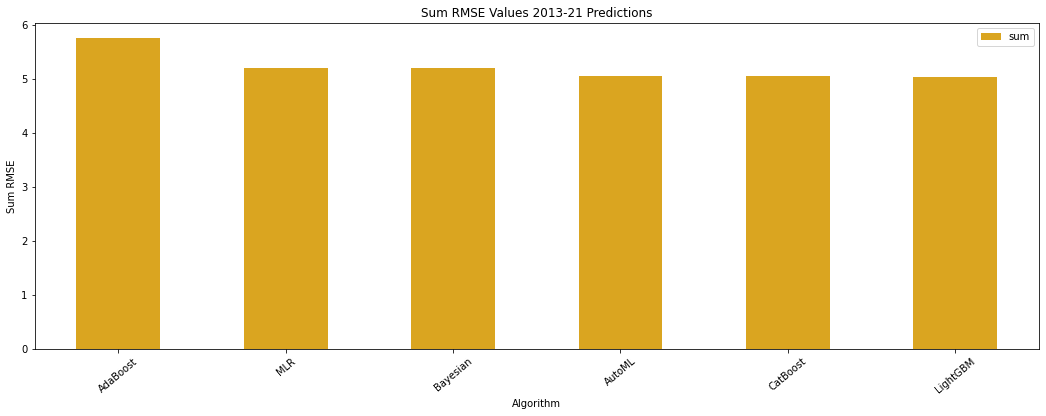

In [401]:
# rmse results
grouped_multiple = vis2.groupby(['Algorithm']).agg({'RMSE': ['mean', 'median', 'max', 'sum']})
grouped_multiple.columns = ['mean','median','max','sum']
grouped_multiple.reset_index(inplace=True)
distdf = grouped_multiple.sort_values(by=['sum'], ascending=False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'sum', rot = 40, figsize=(18, 6), color='goldenrod', xlabel='Algorithm', ylabel='Sum RMSE', title='Sum RMSE Values 2013-21 Predictions')

<AxesSubplot:title={'center':'Sum MEDAE Values 2013-21 Predictions'}, xlabel='Algorithm', ylabel='Sum MEDAE'>

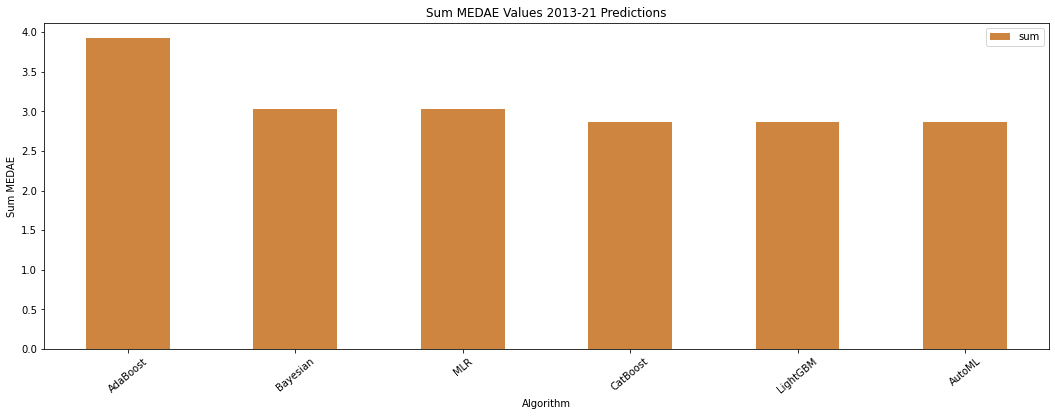

In [402]:
# median results
grouped_multiple = vis2.groupby(['Algorithm']).agg({'MEDAE': ['mean', 'median', 'max', 'sum']})
grouped_multiple.columns = ['mean','median','max','sum']
grouped_multiple.reset_index(inplace=True)
distdf = grouped_multiple.sort_values(by=['sum'], ascending=False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'sum', rot = 40, figsize=(18, 6), color='peru', xlabel='Algorithm', ylabel='Sum MEDAE', title='Sum MEDAE Values 2013-21 Predictions')

<AxesSubplot:title={'center':'Mean Accuracy Values 2013-21 Predictions'}, xlabel='Algorithm', ylabel='Average Accuracy'>

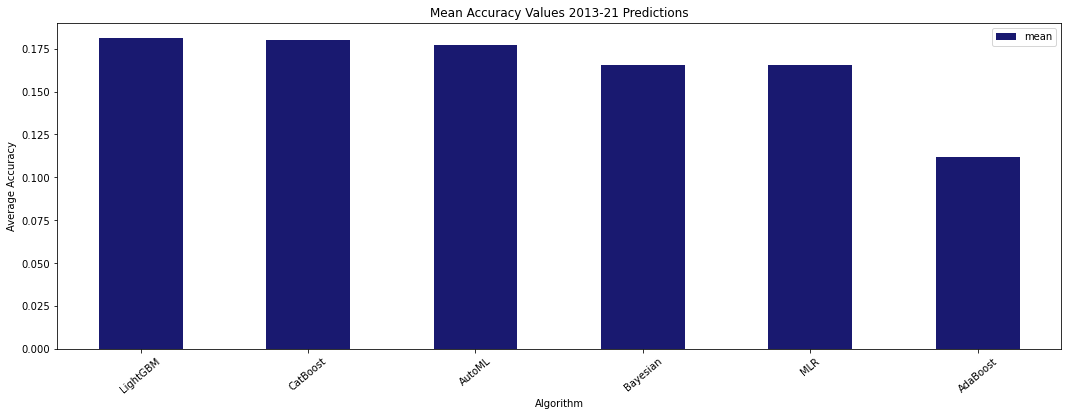

In [407]:
grouped_multiple = vis2.groupby(['Algorithm']).agg({'Accuracy': ['mean', 'median', 'max', 'sum']})
grouped_multiple.columns = ['mean','median','max','sum']
grouped_multiple.reset_index(inplace=True)
distdf = grouped_multiple.sort_values(by=['mean'], ascending=False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'mean', rot = 40, figsize=(18, 6), color='midnightblue', xlabel='Algorithm', ylabel='Average Accuracy', title='Mean Accuracy Values 2013-21 Predictions')

<AxesSubplot:title={'center':'Sum MSE Values 2013-21 Predictions'}, xlabel='Algorithm', ylabel='Sum MSE'>

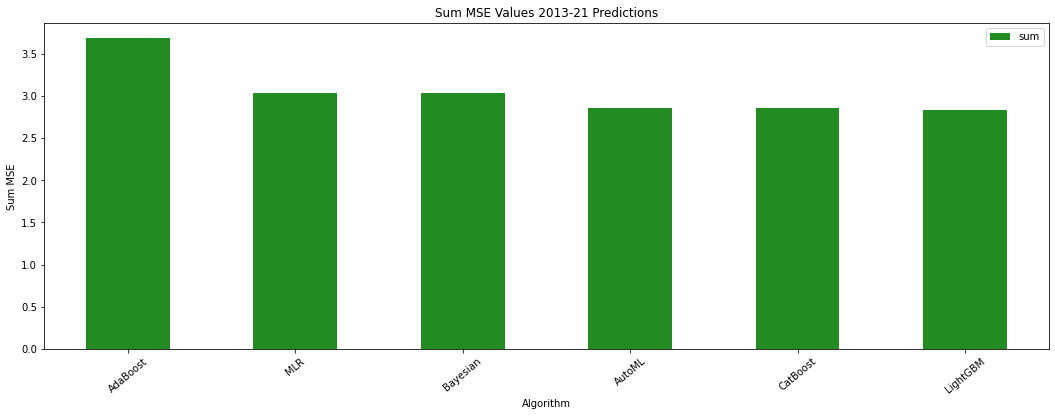

In [404]:
# mse results
grouped_multiple = vis2.groupby(['Algorithm']).agg({'MSE': ['mean', 'median', 'max', 'sum']})
grouped_multiple.columns = ['mean','median','max','sum']
grouped_multiple.reset_index(inplace=True)
distdf = grouped_multiple.sort_values(by=['sum'], ascending=False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'sum', rot = 40, figsize=(18, 6), color='forestgreen', xlabel='Algorithm', ylabel='Sum MSE', title='Sum MSE Values 2013-21 Predictions')

## Key takeaways from our graphs above
- LightGBM appears to perform the best overall - The lightGBM algorithm has the highest accuracy results and best scores at RMSE (MSE also but much the same thing) level. It also has the second best MEDAE values.
- AdaBoost - AdaBoost really does struggle and is no where near our other models. Despite it performing well in some of the related works I read it is something I will be dropping going forward.
- Accuracy - accuracy is something that needs to be improved significantly. Our average results are just above every 1 in 6 accurate predictions for the best performing algorithms. We will need to add more features or try different types of encoding here to improve our results.